In [116]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
import operator
from sklearn.metrics import roc_curve, auc

In [117]:
df=pd.read_csv('Clothing_Store.csv')

In [118]:
df=df.head(20000)

In [119]:
del df['CLUSTYPE']
del df['HHKEY'], df['ZIP_CODE'], df['REC'], df['PC_CALC20'] 
del df['STORELOY']

In [120]:
df['RESP'].value_counts()
'The proporation of responders is %'+str(np.sum(df['RESP']==1)/float(df.shape[0])*100)+'.'

'The proporation of responders is %16.7.'

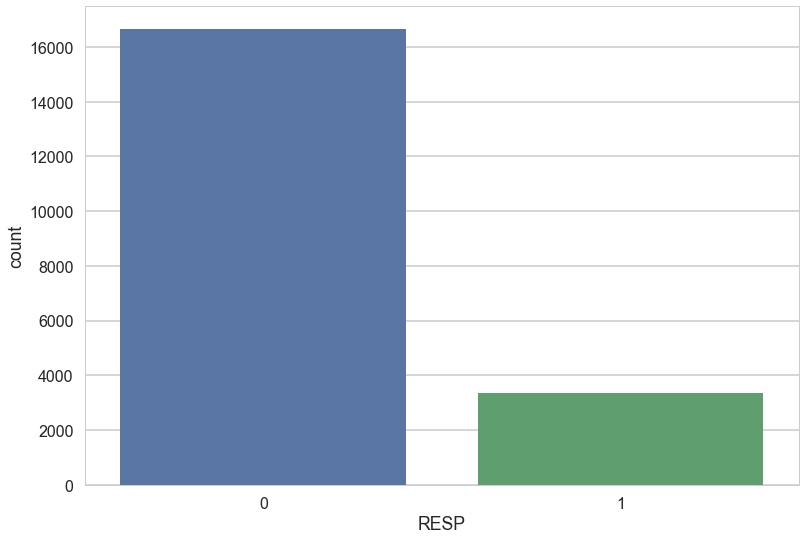

In [121]:
sns.countplot(x='RESP',data=df)
plt.savefig('RESP Freq')

In [122]:
np.sum(df['PERCRET']>1)

489

In [123]:
df['VALPHON']=(df['VALPHON']=='Y')*1

In [124]:
for v in df.columns:
    l=df[v].unique()
    if len(l)<5:
        print v,l

CC_CARD [0 1]
VALPHON [0 1]
WEB [0 1]
RESP [0 1]


In [125]:
df.shape

(20000, 45)

In [126]:
numerical_variable_list=[]
for v in df.columns:
    l=df[v].unique()
    if len(l)>5:
        numerical_variable_list.append(v)
len(numerical_variable_list)

41

In [127]:
categorical_variable_list=[]
for v in df.columns:
    if v!='RESP':
        l=df[v].unique()
        if len(l)<5:
            categorical_variable_list.append(v)
len(categorical_variable_list)

3

In [128]:
df.describe().T

count        mean         std   min     25%      50%         75%       max
FRE           20000.0    5.091050    6.453026  1.00    1.00    3.000    6.000000    115.00
MON           20000.0  473.691496  641.960631  0.99  135.00  263.000  569.095000  22511.49
CC_CARD       20000.0    0.381450    0.485755  0.00    0.00    0.000    1.000000      1.00
AVRG          20000.0  113.060437   86.738510  0.49   60.66   91.470  138.990000   1919.88
PSWEATERS     20000.0    0.215508    0.230984  0.00    0.00    0.160    0.310000      1.00
PKNIT_TOPS    20000.0    0.027374    0.069176  0.00    0.00    0.000    0.030000      1.00
PKNIT_DRES    20000.0    0.041632    0.111345  0.00    0.00    0.000    0.020000      1.00
PBLOUSES      20000.0    0.093474    0.136483  0.00    0.00    0.050    0.140000      1.00
PJACKETS      20000.0    0.135189    0.182225  0.00    0.00    0.040    0.230000      1.00
PCAR_PNTS     20000.0    0.085705    0.139194  0.00    0.00    0.000    0.130000      1.00
PCAS_PNTS     20000.0    0.069573    0.132094  0.00    0.00    0.000    0.090000      1.00
PSHIRTS       20000.0    0.066198    0.116840  0.00    0.00    0.000    0.100000      1.00
PDRESSES      20000.0    0.068160    0.157155  0.00    0.00    0.000    0.060000      1.00
PSUITS        20000.0    0.033072    0.128985  0.00    0.00    0.000    0.000000      1.00
POUTERWEAR    20000.0    0.017866    0.097861  0.00    0.00    0.000    0.000000      1.00
PJEWELRY      20000.0    0.010031    0.037493  0.00    0.00    0.000    0.000000      1.00
PFASHION      20000.0    0.029710    0.077576  0.00    0.00    0.000    0.030000      1.00
PLEGWEAR      20000.0    0.012796    0.050638  0.00    0.00    0.000    0.003975      1.00
PCOLLSPND     20000.0    0.072453    0.173695  0.00    0.00    0.000    0.030000      1.00
AMSPEND       20000.0   14.929038  154.471158  0.00    0.00    0.000    0.000000  10642.72
PSSPEND       20000.0  145.244549  390.041916  0.00    0.00    0.000  123.930000  10526.43
CCSPEND       20000.0  289.385694  448.330108  0.01   78.00  148.555  323.935000  22511.49
AXSPEND       20000.0   24.408172  114.674376  0.00    0.00    0.000    0.000000   4099.92
TMONSPEND     20000.0   90.150070  184.777581  0.00    0.00    0.000  109.970000   5562.46
OMONSPEND     20000.0   31.936100   96.630129  0.00    0.00    0.000    0.000000   2189.00
SMONSPEND     20000.0  223.502457  364.146549  0.00    0.00  108.970  288.705000  13224.07
PREVPD        20000.0   41.771501  107.768023  0.00    0.00    0.000    0.000000   1919.88
GMP           20000.0    0.521571    0.142908  0.00    0.46    0.550    0.620000      0.99
PROMOS        20000.0   11.680550    7.167417  0.00    5.00   12.000   17.000000     38.00
DAYS          20000.0  440.122000  192.982672  1.00  289.00  454.000  631.000000    713.00
FREDAYS       20000.0  171.138207  146.830691  1.00   67.00  123.750  230.000000    713.00
MARKDOWN      20000.0    0.187211    0.128952  0.00    0.09    0.180    0.280000      0.95
CLASSES       20000.0    7.166300    5.365704  1.00    3.00    6.000   10.000000     37.00
COUPONS       20000.0    0.751700    1.684960  0.00    0.00    0.000    1.000000     32.00
STYLES        20000.0   17.287750   24.441128  1.00    5.00    9.000   20.000000    689.00
STORES        20000.0    2.343250    1.612222  1.00    1.00    2.000    3.000000     19.00
VALPHON       20000.0    0.870200    0.336092  0.00    1.00    1.000    1.000000      1.00
WEB           20000.0    0.040700    0.197599  0.00    0.00    0.000    0.000000      1.00
MAILED        20000.0    4.685000    3.553154  0.00    1.00    4.000    8.000000     11.00
RESPONDED     20000.0    1.201700    1.835997  0.00    0.00    0.000    2.000000     11.00
RESPONSERATE  20000.0   17.343255   24.543507  0.00    0.00    0.000   30.000000    100.00
HI            20000.0   37.872429   28.080965  0.05   18.44   29.460   50.000000    200.00
LTFREDAY      20000.0   80.115212   78.490258  0.09   25.03   52.100  106.500000    364.00
PERCRET     

#### Look at data

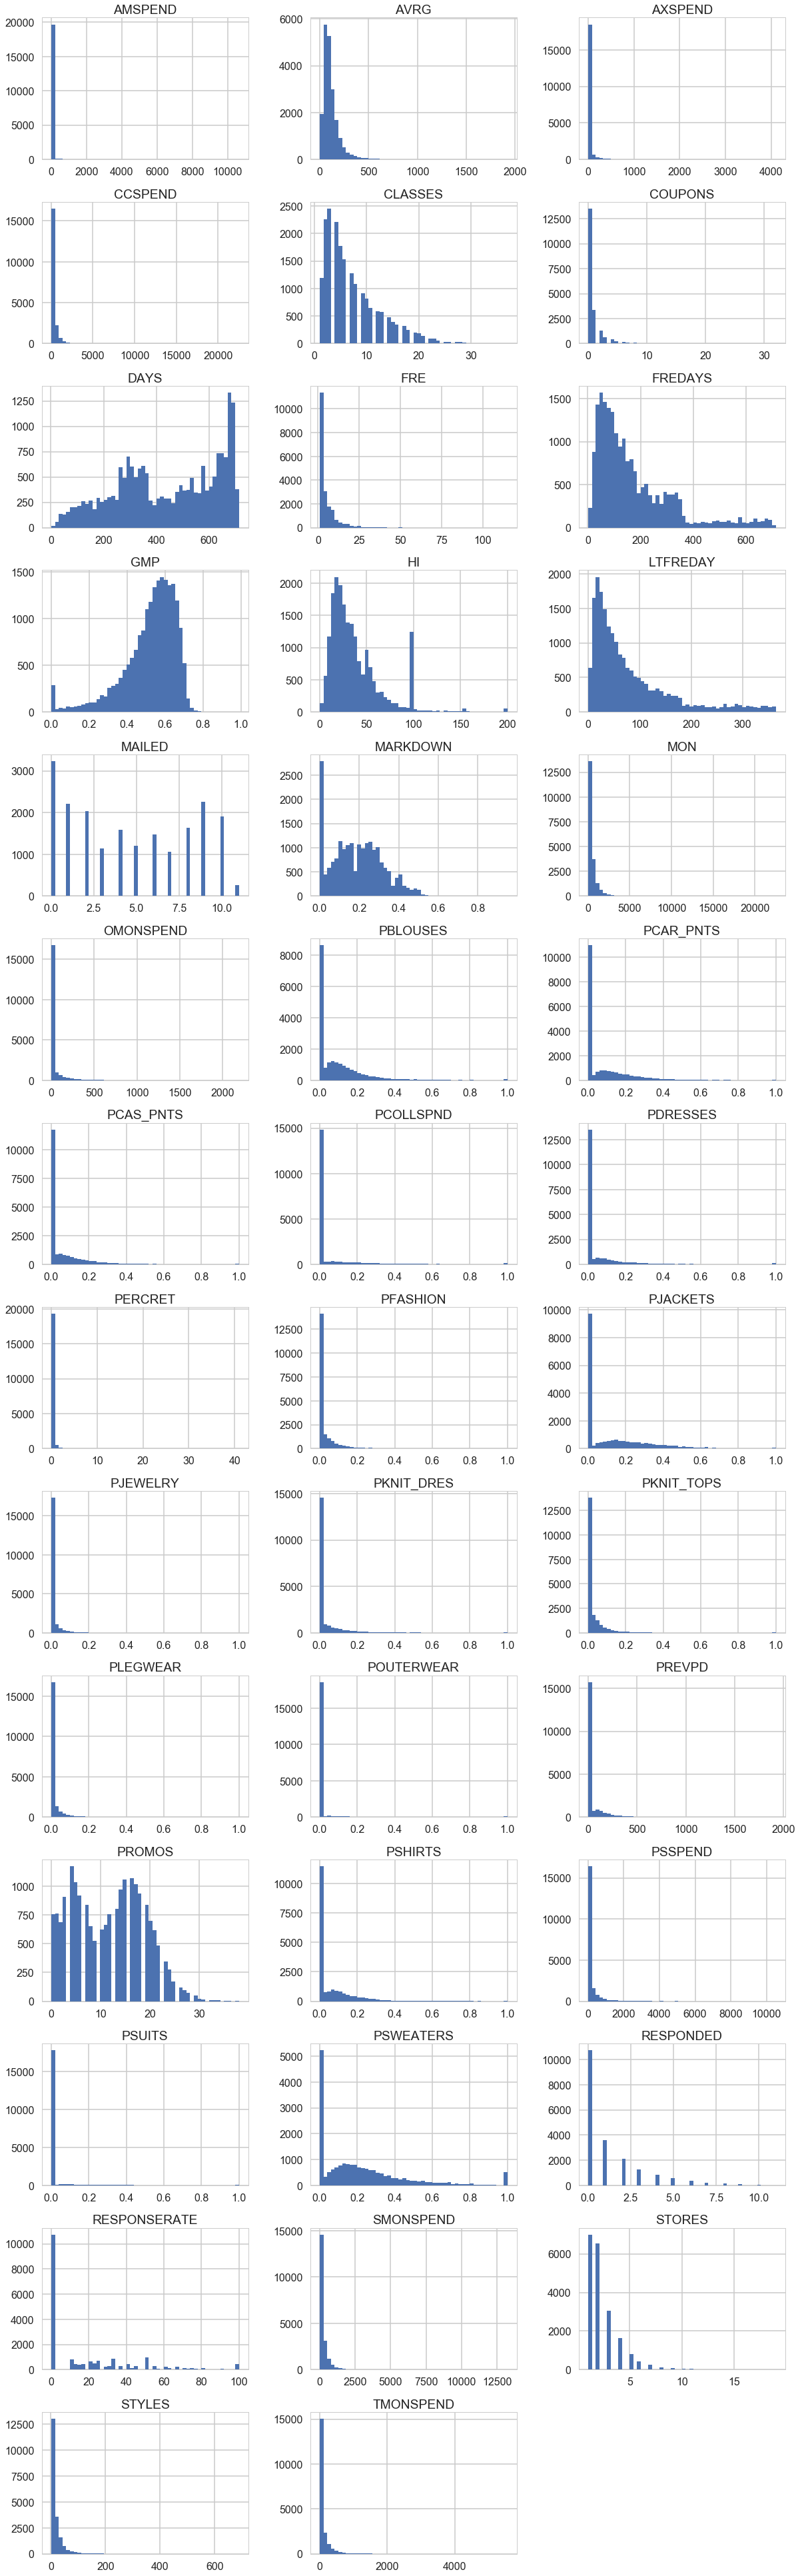

In [129]:
import matplotlib.pyplot as plt
df[numerical_variable_list].hist(bins=50, figsize=(20,70),layout=(14,3))
plt.savefig("numeric_histogram_plots")
plt.show()

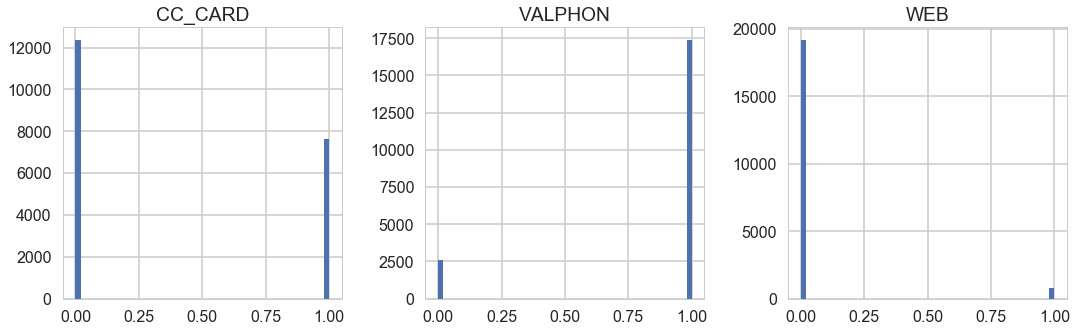

In [130]:
df[categorical_variable_list].hist(bins=50, figsize=(18,5),layout=(1,3))
plt.savefig("categorical_histogram_plots")
plt.show()

#### One finding and one problem
* One problem: Distribution of many variables are right skewed
* One finding: indicator variables might be added to address the importance of absence. columns where the existence or lack thereof of a zero may be important in a classifier. We used our intuition to make these choices, believing that there is additional information encoded in say, PERCRET: if you never returned anything you might not be a budget shopper and thus someone who might have the money to shop quite a bit...
* Adding new variable might be helpful for classification


In [131]:
ZERO_IMPORTANT_VARS = [u'PREVPD', u'AMSPEND', u'PSSPEND', u'CCSPEND', u'AXSPEND', u'RESPONDED', u'PERCRET']

In [132]:
PERCENT_VARS=[ u'PSWEATERS', u'PKNIT_TOPS', u'PKNIT_DRES', u'PBLOUSES', u'PJACKETS', u'PCAR_PNTS', u'PCAS_PNTS', u'PSHIRTS', 
              u'PDRESSES', u'PSUITS', u'POUTERWEAR', u'PJEWELRY', u'PFASHION', u'PLEGWEAR', u'PCOLLSPND']
len(PERCENT_VARS)

15

In [133]:
for p in ZERO_IMPORTANT_VARS:
    df['i_'+p]=(df[p] > 0.0)*1
    categorical_variable_list.append('i_'+p)

In [134]:
for p in PERCENT_VARS:
    df['i_'+p]=(df[p] > 0.0)*1
    categorical_variable_list.append('i_'+p)

In [135]:
#create recent usage (1 month and 3 month),  sale-shopper (markdown+coupon)
df["i_RECENT"]=1*((df.OMONSPEND > 0) | (df.TMONSPEND > 0))
df["i_SAVER"]=1*((df.MARKDOWN > 0) | (df.COUPONS > 0))
categorical_variable_list.append("i_RECENT")
categorical_variable_list.append("i_SAVER")

In [136]:
len(categorical_variable_list),len(numerical_variable_list)

(27, 41)

#### Log transformation and square root transformation for numerical variables to reduce variance. Whole dateset.
* value include zero uses square root
* value not include zeor uses log

In [137]:
numeric_vars_inld_zero=[]
numeric_vars_not_inld_zero=[]
for i,j in dict(df[numerical_variable_list].describe().min()).items():
    if j==0:
        numeric_vars_inld_zero.append(i)
    if j>0:
        numeric_vars_not_inld_zero.append(i)

In [138]:
df_fe=pd.concat([np.log(df[numeric_vars_not_inld_zero]), np.sqrt(df[numeric_vars_inld_zero]),df[categorical_variable_list],
              df['RESP']], axis=1)
df_fe.head()

STORES      DAYS        HI  LTFREDAY    STYLES      AVRG       FRE   CCSPEND   CLASSES       MON   FREDAYS  PDRESSES  PKNIT_TOPS  PCAS_PNTS  AXSPEND    MAILED  PJEWELRY  RESPONSERATE   PSHIRTS  SMONSPEND  PSWEATERS  RESPONDED  OMONSPEND  AMSPEND  PBLOUSES  PFASHION   COUPONS  MARKDOWN     PREVPD  PCOLLSPND  PSSPEND       GMP  PJACKETS  PKNIT_DRES    PROMOS   PERCRET  POUTERWEAR  TMONSPEND  PCAR_PNTS  PSUITS  PLEGWEAR  CC_CARD  VALPHON  WEB  i_PREVPD  i_AMSPEND  i_PSSPEND  i_CCSPEND  \
0     0.0  6.501290  3.459781  4.709530  2.397895  5.216185  0.693147  5.909332  2.197225  5.909332  5.808142  0.000000    0.000000   0.000000      0.0  2.236068  0.000000      0.000000  0.435890   0.000000   0.424264   0.000000   0.000000      0.0  0.547723  0.141421  1.000000  0.282843   0.000000   0.538516      0.0  0.774597  0.000000    0.000000  4.123106  0.000000         0.0   0.000000   0.500000     0.0  0.173205        0        0    0         0          0          0          1   
1     0.0  6.545350  3.487987  3.772761  2.639057  4.166665  1.386294  5.552960  1.791759  5.552960  5.159055  0.424264    0.400000   0.374166      0.0  2.000000  0.000000      7.071068  0.000000  16.062378   0.509902   1.414214   7.482647      0.0  0.000000  0.000000  0.000000  0.574456   0.000000   0.608276      0.0  0.734847  0.000000    0.000000  3.741657  0.173205         0.0  11.747340   0.424264     0.0  0.141421        1        1    0         0          0          0          1   
2     0.0  5.837730  4.605170  4.228293  0.693147  3.650658  0.693147  4.343805  0.000000  4.343805  5.144583  0.000000    0.000000   0.000000      0.0  2.000000  0.000000      0.000000  0.000000   0.000000   1.000000   0.000000   0.000000      0.0  0.000000  0.000000  0.000000  0.331662   6.244998   0.000000      0.0  0.787401  0.000000    0.000000  3.162278  0.000000         0.0   0.000000   0.000000     0.0  0.000000        0        0    0         1          0          0          1   
3     0.0  6.552508  3.147165  3.294354  3.555348  4.661078  2.079442  6.740590  2.708050  6.740590  4.473009  0.000000    0.000000   0.000000      0.0  3.000000  0.072849      8.165170  0.223607  19.335718   0.616441   2.449490   0.000000      0.0  0.244949  0.173205  1.732051  0.538516  12.893797   0.000000      0.0  0.655744  0.447214    0.223607  4.898979  0.000000         0.0  10.244023   0.412311     0.0  0.100000        1        1    0         1          0          0          1   
4     0.0  3.891820  3.350606  3.198673  2.079442  4.470953  0.000000  4.470953  1.386294  4.470953  3.891820  0.000000    0.447214   0.640312      0.0  0.000000  0.412311      0.000000  0.000000   9.350936   0.447214   0.000000   0.000000      0.0  0.000000  0.000000  0.000000  0.648074   0.000000   0.000000      0.0  0.469042  0.000000    0.000000  0.000000  0.000000         0.0   9.350936   0.000000     0.0  0.000000        0        1    0         0          0          0          1   

   i_AXSPEND  i_RESPONDED  i_PERCRET  i_PSWEATERS  i_PKNIT_TOPS  i_PKNIT_DRES  i_PBLOUSES  i_PJACKETS  i_PCAR_PNTS  i_PCAS_PNTS  i_PSHIRTS  i_PDRESSES  i_PSUITS  i_POUTERWEAR  i_PJEWELRY  i_PFASHION  i_PLEGWEAR  i_PCOLLSPND  i_RECENT  i_SAVER  RESP  
0          0            0          0            1             0             0           1           0            1            0          1           0         0             0           0           1           1            1         0        1     0  
1          0            1          1            1             1             0           0           0            1            1          0           1         0             0           0           0           1            1         1        1     1  
2          0            0          0            1             0             0           0           0            0            0          0           0         0             0           0           0           0            0         0        1     0  
3          0            1          0    

In [139]:
numerical_variable_list=[ 'z ln '+i for i in numeric_vars_not_inld_zero]+[ 'z sqrt '+i for i in numeric_vars_inld_zero]

In [140]:
rename_cols=[ 'z ln '+i for i in numeric_vars_not_inld_zero]+[ 'z sqrt '+i for i in numeric_vars_inld_zero]+categorical_variable_list+['RESP']

In [141]:
df_fe=pd.DataFrame(df_fe.values,columns=rename_cols)

Check numerical variables again after transfromation

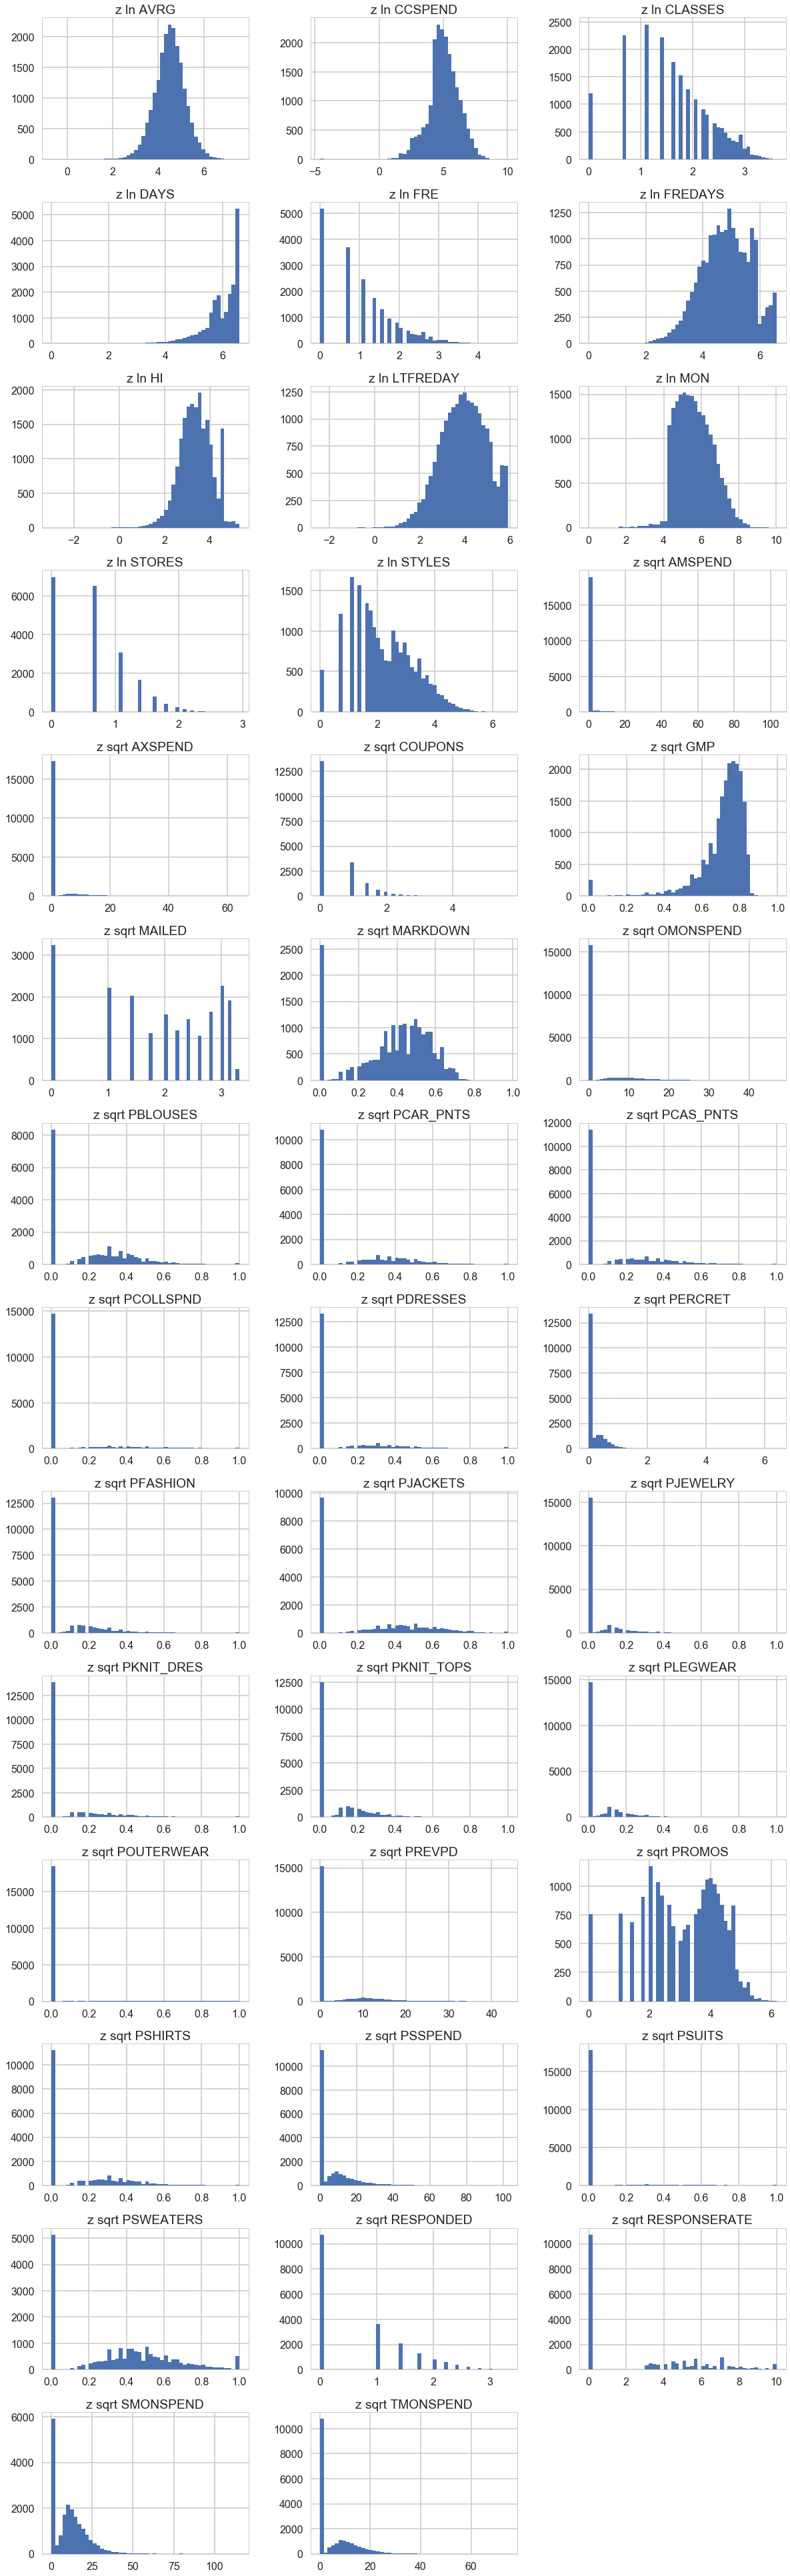

In [142]:
df_fe[numerical_variable_list].hist(bins=50, figsize=(20,70),layout=(14,3))
plt.savefig("numeric_histogram_plots_after_transform")
plt.show()

### Test and Training Sets, and Standardization

#### Train Test Split

In [143]:
X=df_fe[categorical_variable_list+numerical_variable_list]
y=df_fe['RESP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [144]:
X_train.shape,X_test.shape

((14000, 68), (6000, 68))

#### Standardization

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_variable_list] = scaler.fit_transform(X_train[numerical_variable_list])
X_test[numerical_variable_list]= scaler.fit_transform(X_test[numerical_variable_list])

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [146]:
df_train=X_train.copy()
df_train['RESP']=y_train

#### Reletionship between predictors and repsonse variable.

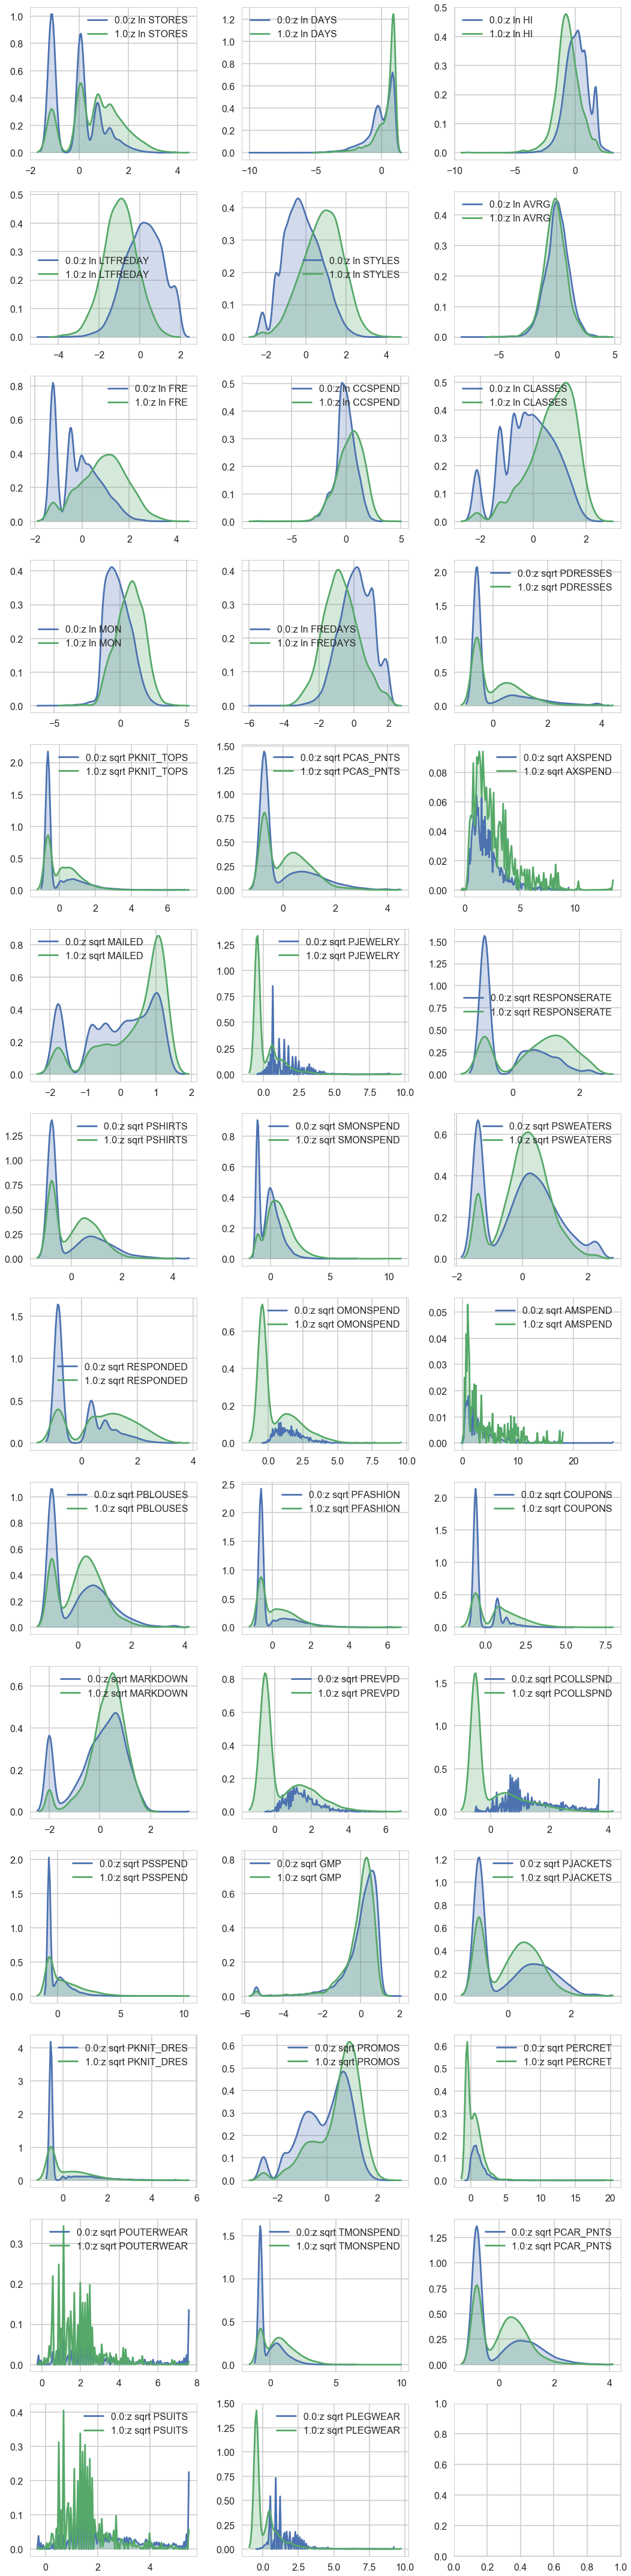

In [147]:
dfgb=df_train.groupby('RESP')
fig, axes = plt.subplots(nrows=14, ncols=3, figsize=(15, 60), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), numerical_variable_list):
    for k, v in dfgb[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+":"+v.name,shade=True)
plt.savefig('Relationships Between the Numeric Predictors and the Response')
plt.show()

In [148]:
len(categorical_variable_list)

27

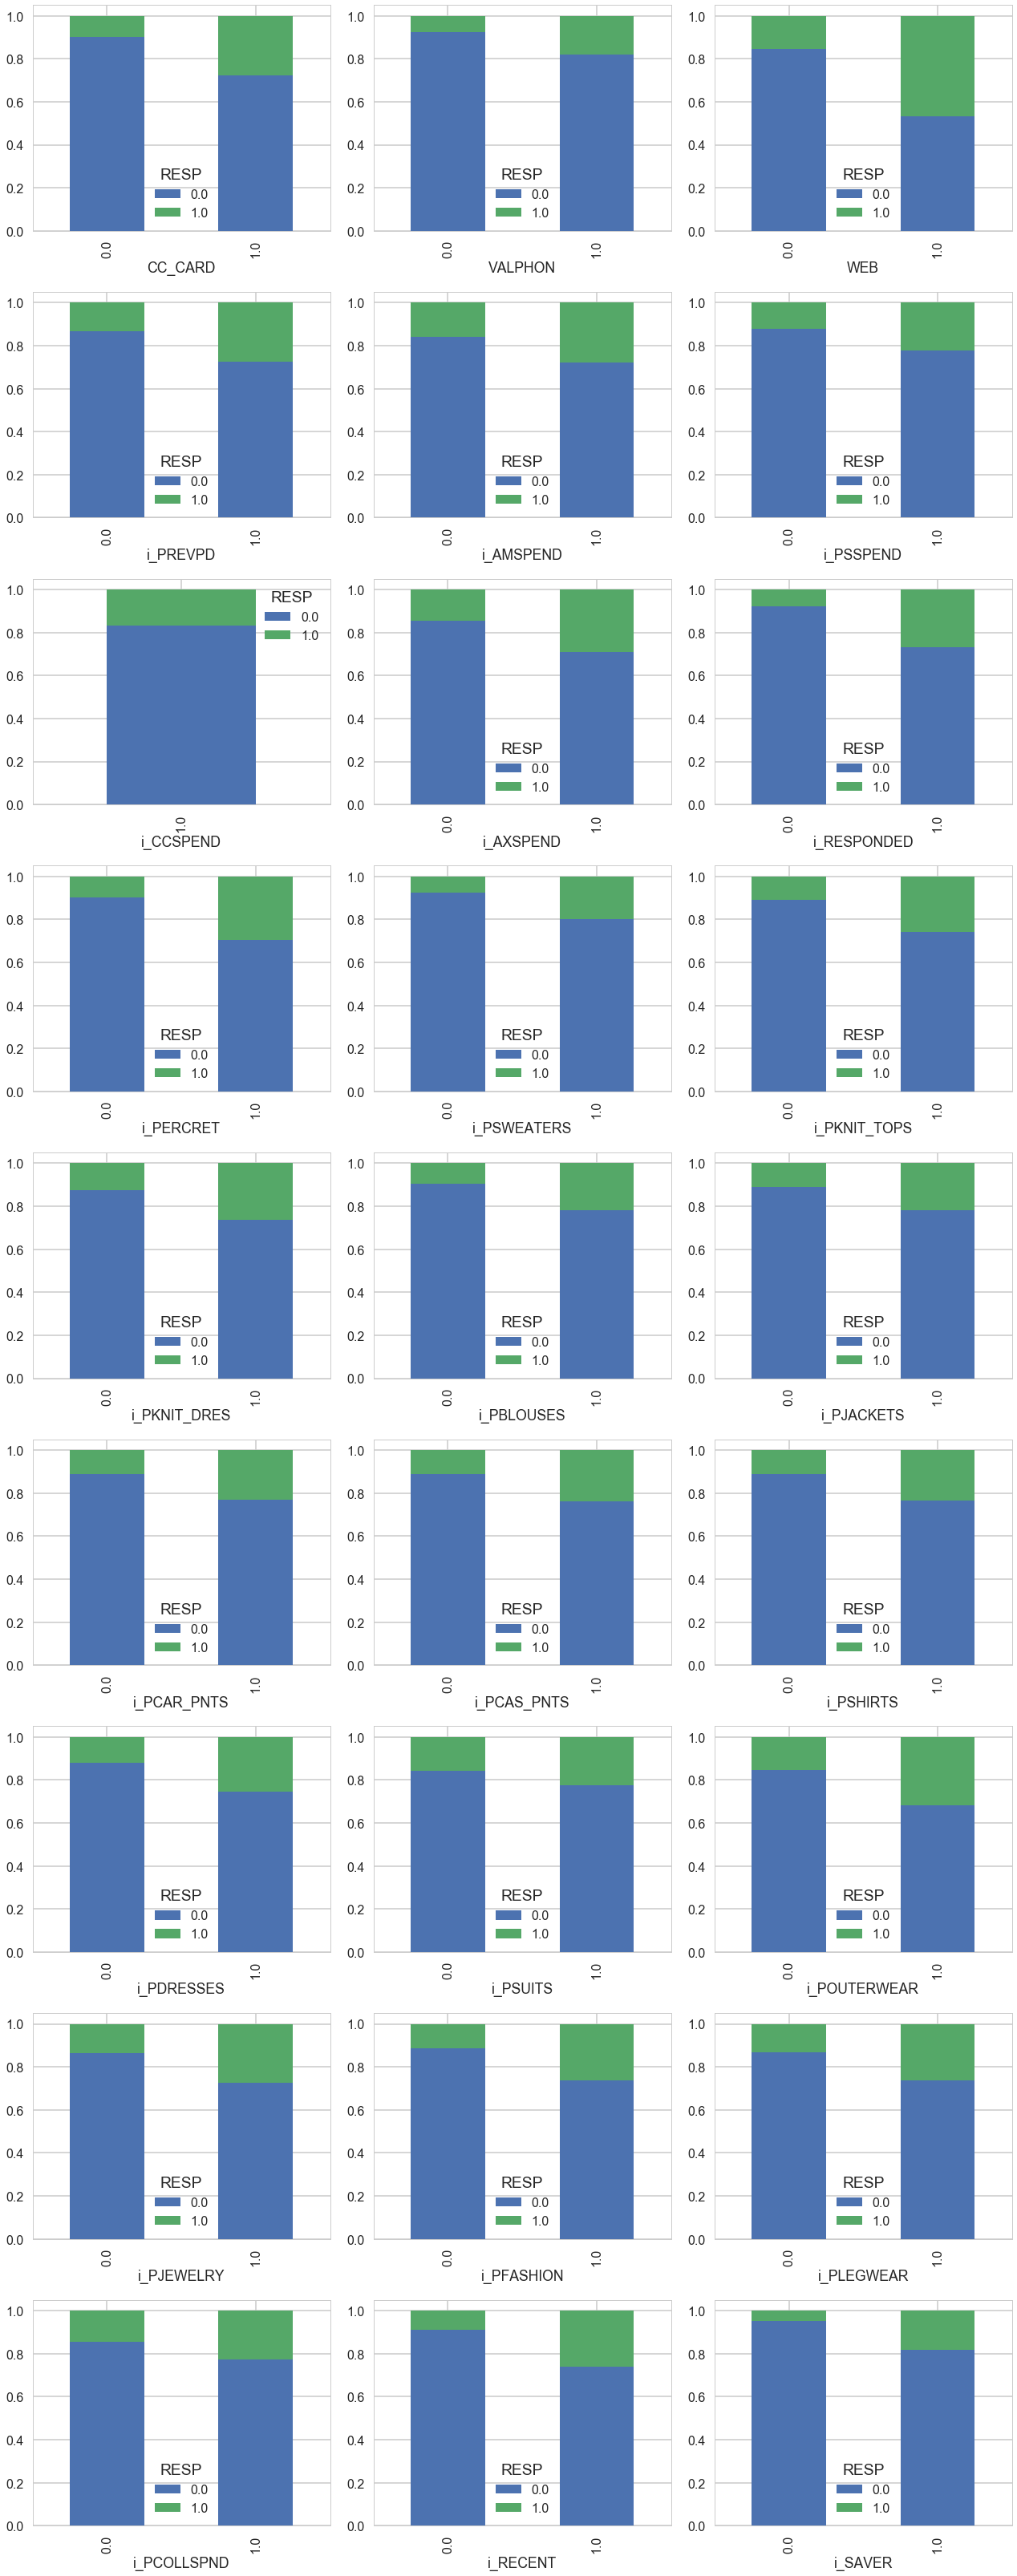

In [149]:
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(18, 45), 
                         tight_layout=True)

for ax, p in zip(axes.ravel(), categorical_variable_list): 
    table=pd.crosstab(df_train[p],df_train['RESP'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',ax=ax,stacked='True')
plt.savefig('Relationships Between the Categorical Predictors and the Response')
plt.show()

#### Feature selection

We can also get a notion of which features are important in the classification process by seeing how they correlate with the response. Implement some code to obtain the Pearson correlation coefficient between each of our features and the response. Do this on the training set only! Create a dataframe indexed by the features, which has columns abscorr the absolute value of the correlation and corr the value of the correlation. Sort the dataframe by abscorr, highest first, and show the top 25 features with the highest absolute correlation.

In [150]:
from scipy.stats.stats import pearsonr
correlations=[]
dftousetrain=df_train
for col in dftousetrain[numerical_variable_list+categorical_variable_list].columns.values:
    r=pearsonr(dftousetrain[col].values, df_train['RESP'].values)[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(20).to_csv('top 20 correlated variables with response.csv')
bpdf.head(20)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


abscorr      corr
feature                                
z ln LTFREDAY        0.433081 -0.433081
z ln FRE             0.396440  0.396440
z ln STYLES          0.364245  0.364245
z sqrt RESPONDED     0.336087  0.336087
z sqrt SMONSPEND     0.329911  0.329911
z sqrt COUPONS       0.329340  0.329340
z ln MON             0.328391  0.328391
z ln CLASSES         0.320571  0.320571
z sqrt RESPONSERATE  0.319525  0.319525
z ln FREDAYS         0.319239 -0.319239
z ln STORES          0.287956  0.287956
z ln HI              0.286218 -0.286218
z sqrt TMONSPEND     0.285882  0.285882
i_RESPONDED          0.258044  0.258044
i_PERCRET            0.251123  0.251123
z sqrt OMONSPEND     0.239327  0.239327
CC_CARD              0.232097  0.232097
i_RECENT             0.230145  0.230145
z sqrt PSSPEND       0.212784  0.212784
z sqrt PROMOS        0.202104  0.202104

In [151]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
selector.support_ 

selector.ranking_


array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

In [152]:
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [153]:
def pearson_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=pearsonr(v, y)
        i=i+1
    return np.abs(rs), pvals

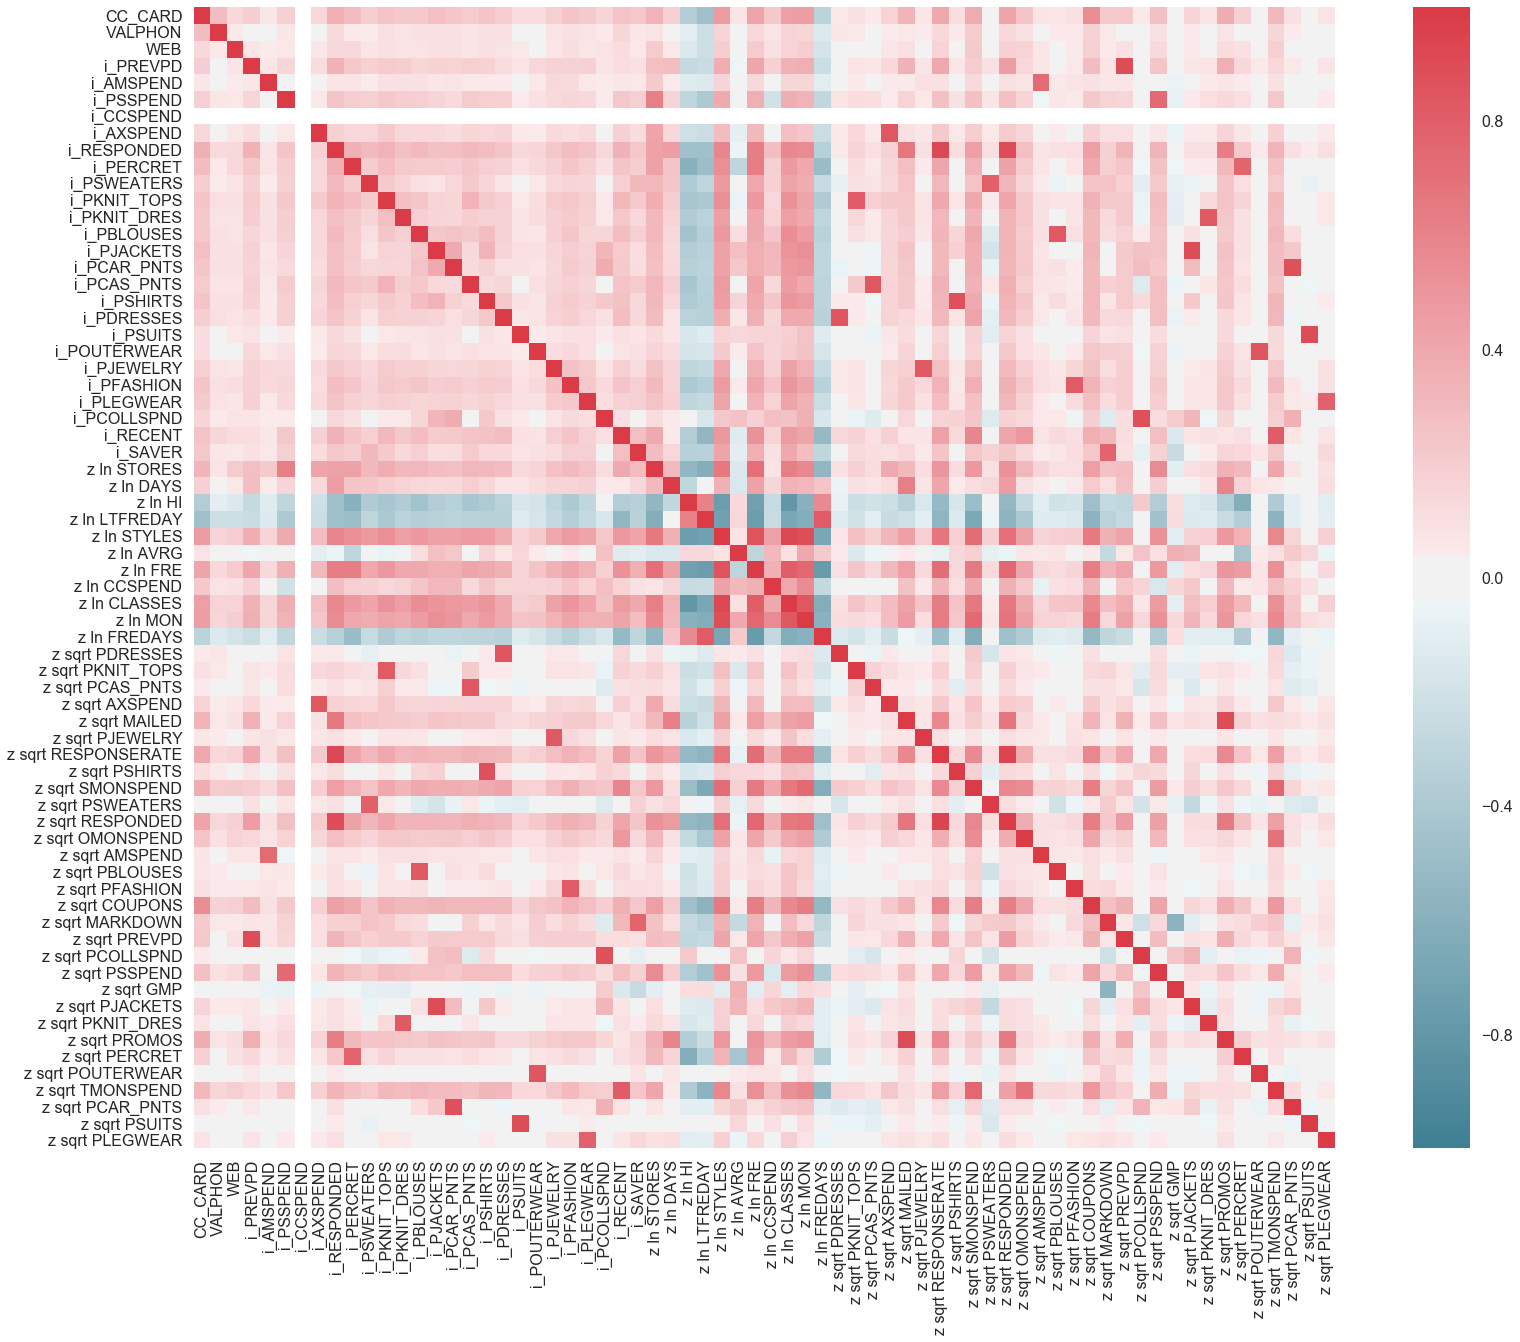

In [154]:
import seaborn as sns

f, ax = plt.subplots(figsize=(28, 21))
corr = X_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('Relationships Between the predictors')
plt.show()

#### List all inputs

In [155]:
categorical_variable_list+numerical_variable_list

['CC_CARD',
 'VALPHON',
 'WEB',
 u'i_PREVPD',
 u'i_AMSPEND',
 u'i_PSSPEND',
 u'i_CCSPEND',
 u'i_AXSPEND',
 u'i_RESPONDED',
 u'i_PERCRET',
 u'i_PSWEATERS',
 u'i_PKNIT_TOPS',
 u'i_PKNIT_DRES',
 u'i_PBLOUSES',
 u'i_PJACKETS',
 u'i_PCAR_PNTS',
 u'i_PCAS_PNTS',
 u'i_PSHIRTS',
 u'i_PDRESSES',
 u'i_PSUITS',
 u'i_POUTERWEAR',
 u'i_PJEWELRY',
 u'i_PFASHION',
 u'i_PLEGWEAR',
 u'i_PCOLLSPND',
 'i_RECENT',
 'i_SAVER',
 'z ln STORES',
 'z ln DAYS',
 'z ln HI',
 'z ln LTFREDAY',
 'z ln STYLES',
 'z ln AVRG',
 'z ln FRE',
 'z ln CCSPEND',
 'z ln CLASSES',
 'z ln MON',
 'z ln FREDAYS',
 'z sqrt PDRESSES',
 'z sqrt PKNIT_TOPS',
 'z sqrt PCAS_PNTS',
 'z sqrt AXSPEND',
 'z sqrt MAILED',
 'z sqrt PJEWELRY',
 'z sqrt RESPONSERATE',
 'z sqrt PSHIRTS',
 'z sqrt SMONSPEND',
 'z sqrt PSWEATERS',
 'z sqrt RESPONDED',
 'z sqrt OMONSPEND',
 'z sqrt AMSPEND',
 'z sqrt PBLOUSES',
 'z sqrt PFASHION',
 'z sqrt COUPONS',
 'z sqrt MARKDOWN',
 'z sqrt PREVPD',
 'z sqrt PCOLLSPND',
 'z sqrt PSSPEND',
 'z sqrt GMP',
 'z s

### M phase

In [156]:

def cv_optimize(clf, parameters, X_train, y_train, X_test, y_test, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters,  cv=n_folds)
    gs.fit(X_train, y_train)
    print "BEST", gs.best_params_
#     , gs.best_score_, gs.grid_scores_
    clf = gs.best_estimator_
    clf=clf.fit(X_train, y_train)
    training_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(y_test, clf.predict(X_test))
    print "########################################################"
    return clf

#### Ridge Logistic Regression

In [157]:
%%time
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l2")
c={"C": [0.001, 0.1,10.0,100.0]}
clf_l2=cv_optimize(logclf,c,X_train,y_train,X_test,y_test)

BEST {'C': 0.1}
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.86
[[4829  153]
 [ 708  310]]
########################################################
Wall time: 6.17 s


#### Lasso Logistic Regression

In [158]:
%%time
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l1")
c={"C": [0.001, 0.1,10.0,100.0]}
clf_l1=cv_optimize(logclf,c,X_train,y_train,X_test,y_test)

BEST {'C': 0.1}
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.86
[[4831  151]
 [ 708  310]]
########################################################
Wall time: 10.9 s


In [159]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.856
Test set accuracy: 0.856
Training set accuracy: 0.857
Test set accuracy: 0.856


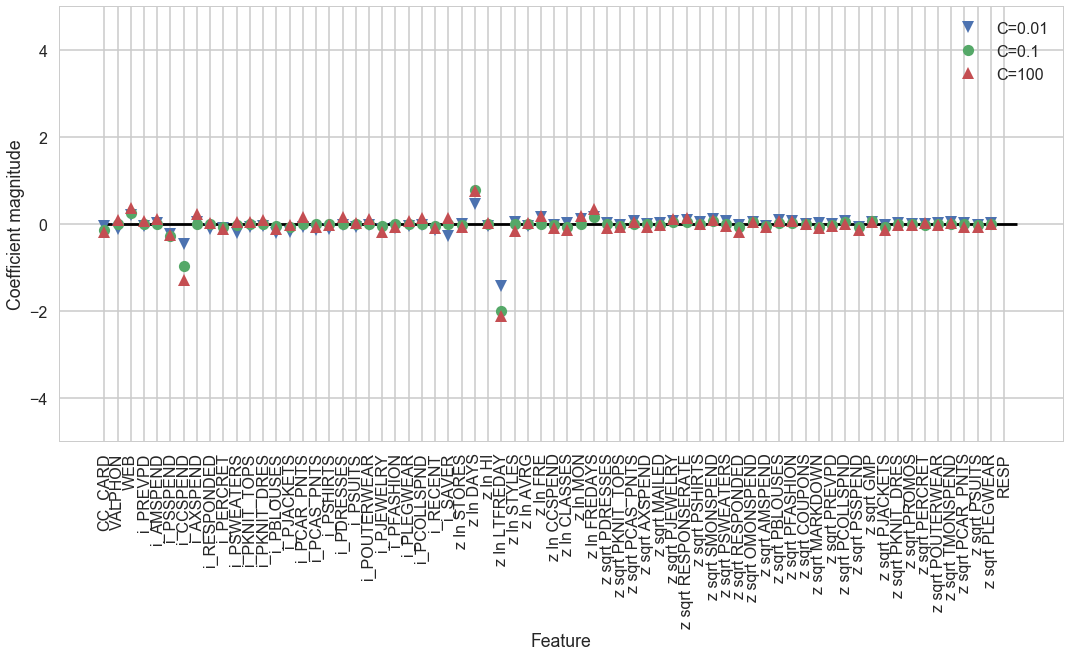

In [160]:
columns=df_train.columns
data_features = [x for i,x in enumerate(columns) if i!=8]

plt.figure(figsize=(18,8))
plt.plot(logreg001.coef_.T, 'v', label="C={}".format(logreg001.C))
plt.plot(clf_l1.coef_.T, 'o', label="C={}".format(clf_l1.C))
plt.plot(logreg100.coef_.T, '^', label="C={}".format(logreg100.C))
plt.xticks(range(df_train.shape[1]), columns, rotation=90)
plt.hlines(0, 0, df_train.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

In [161]:
def nonzero_lasso(clf,col):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=col, 
                             coef=clf.coef_[0], 
                             abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef', ascending=False)

In [162]:
df_train_columns=df_train.columns[:-1]
lasso_importances=nonzero_lasso(clf_l1,df_train_columns)
lasso_importances.set_index("feature", inplace=True)
lasso_importances.head(20).to_csv('lasso_selection.csv')
lasso_importances.head(20)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


abscoef      coef
feature                                
z ln LTFREDAY        1.997376 -1.997376
i_CCSPEND            0.977774 -0.977774
z ln DAYS            0.782651  0.782651
i_PSSPEND            0.278847 -0.278847
WEB                  0.257717  0.257717
z ln FREDAYS         0.170204  0.170204
CC_CARD              0.150024 -0.150024
z sqrt PSSPEND       0.078829 -0.078829
i_PJACKETS           0.078744 -0.078744
z ln CLASSES         0.073835 -0.073835
z sqrt PJACKETS      0.073598 -0.073598
z sqrt GMP           0.068062  0.068062
z sqrt RESPONDED     0.065557 -0.065557
z sqrt MARKDOWN      0.063538 -0.063538
z sqrt SMONSPEND     0.063180  0.063180
i_PERCRET            0.060314 -0.060314
z sqrt PKNIT_TOPS    0.059019 -0.059019
i_PBLOUSES           0.052003 -0.052003
z sqrt RESPONSERATE  0.050836  0.050836
i_PJEWELRY           0.047521 -0.047521

In [163]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()
parameters = {"n_estimators": range(1, 10), "max_depth": [4, 5, 6, 7,8,9,10],'min_samples_leaf': [ 3, 4, 5, 6]}
clf_rf=cv_optimize(clfForest,parameters,X_train,y_train,X_test,y_test)

BEST {'n_estimators': 9, 'max_depth': 7, 'min_samples_leaf': 5}
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.85
[[4889   93]
 [ 812  206]]
########################################################


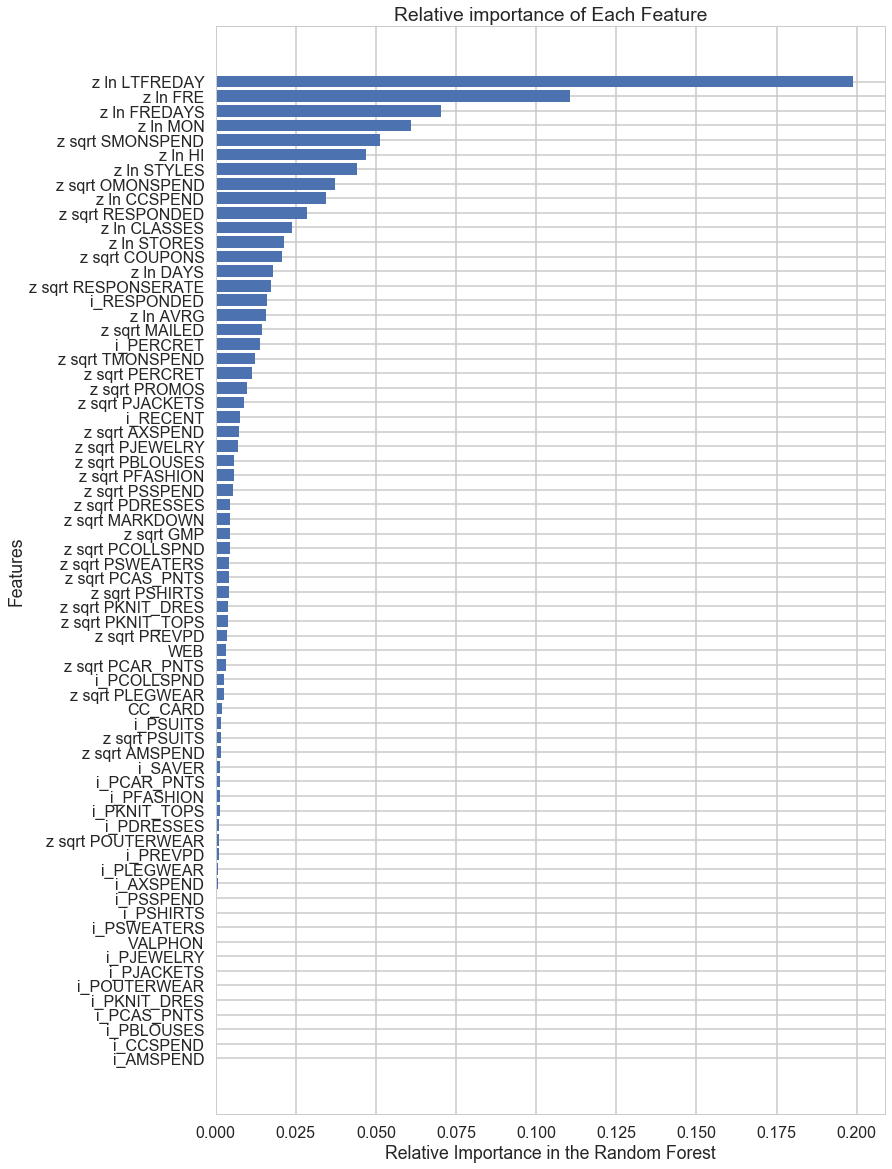

In [164]:
plt.figure(num=None, figsize=(12, 20))
importance_list = clf_rf.feature_importances_
name_list = df_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.savefig('RF importance ')
plt.show()

In [165]:
%%time
import xgboost as xgb
clf_Xgb = xgb.XGBClassifier()
parameters = {"n_estimators": range(1, 3),"reg_alpha":[1e-7,1e-6,0.0001,0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_Xgb=cv_optimize(clf_Xgb,parameters,X_train,y_train,X_test,y_test,score_func='f1')

C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWar

BEST {'n_estimators': 2, 'reg_alpha': 1e-07}
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.86
[[4876  106]
 [ 760  258]]
########################################################
Wall time: 9 s


C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


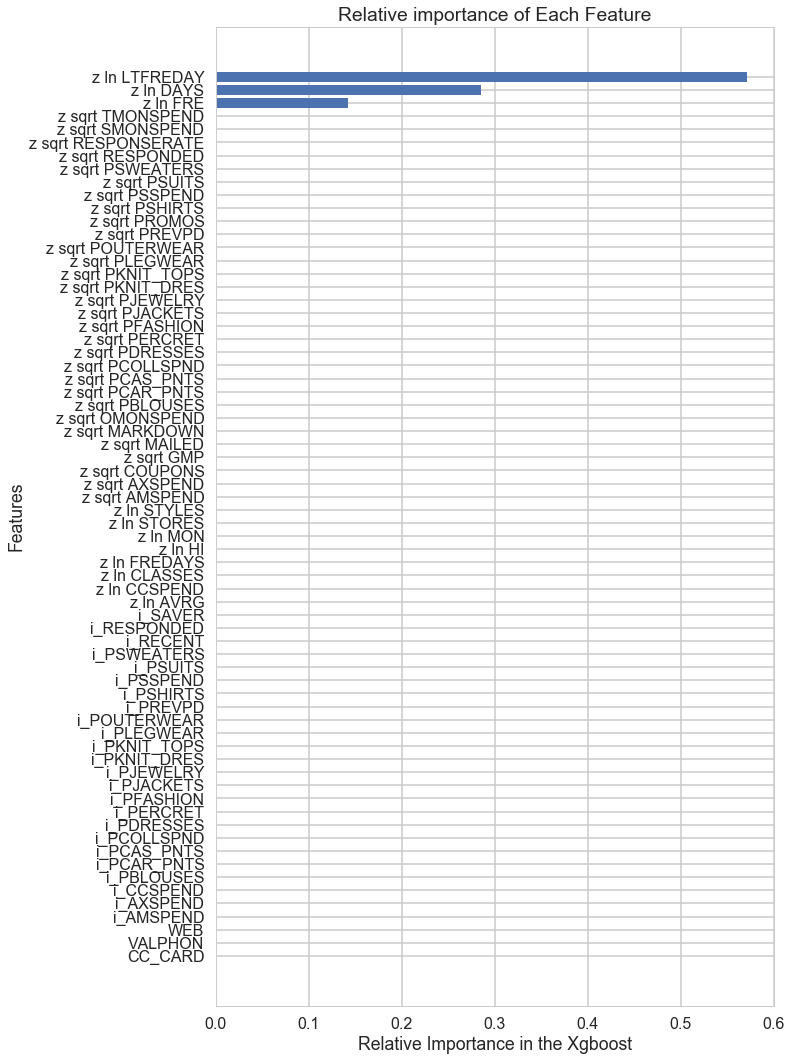

In [166]:
plt.figure(num=None, figsize=(10, 18))
importance_list = clf_Xgb.feature_importances_
name_list = df_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Xgboost')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.savefig('Xgboost importance ')
plt.show()


In [167]:
from sklearn.svm import SVC
rbf_svm= SVC()
c_grid={'C': [0.001, 0.1, 1.0, 100.0,1000.0],'gamma':[1e-5, 1e-7, 1e-9]}
clf_svm_Rbf=cv_optimize(rbf_svm,c_grid,X_train,y_train,X_test,y_test)

BEST {'C': 1000.0, 'gamma': 1e-05}
############# based on standard predict ################
Accuracy on training data: 0.84
Accuracy on test data:     0.84
[[4959   23]
 [ 935   83]]
########################################################


In [168]:
from sklearn.svm import LinearSVC

clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc=cv_optimize(clfsvm,c_grid,X_train,y_train,X_test,y_test)

BEST {'C': 1.0}
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.84
[[4935   47]
 [ 883  135]]
########################################################


In [169]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(random_state=0)
c_grid={'hidden_layer_sizes':[2,3,4,5,6],'activation': ['logistic', 'tanh','relu']}
clf_mlp=cv_optimize(clf_mlp,c_grid,X_train,y_train,X_test,y_test)

BEST {'activation': 'logistic', 'hidden_layer_sizes': 3}
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.86
[[4800  182]
 [ 673  345]]
########################################################


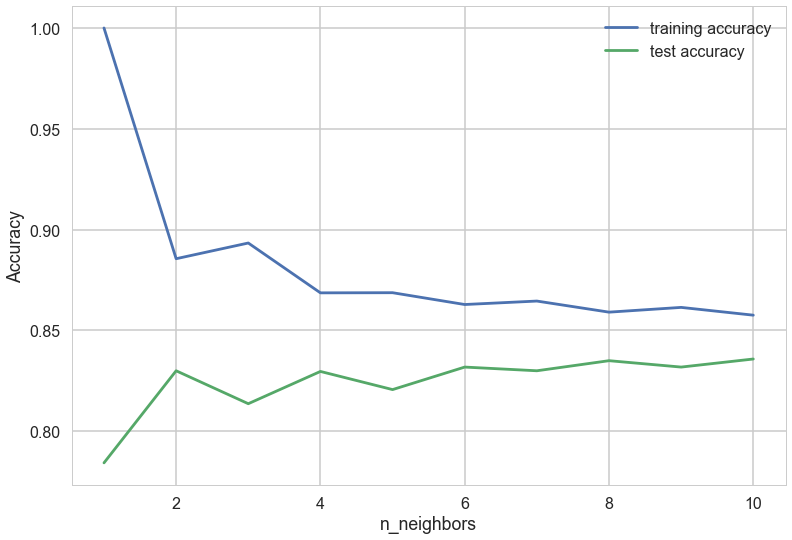

In [170]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [171]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier()
parameters={'n_neighbors':range(2,6)}
clf_knn=cv_optimize(clf,parameters,X_train,y_train,X_test,y_test)

BEST {'n_neighbors': 4}
############# based on standard predict ################
Accuracy on training data: 0.87
Accuracy on test data:     0.83
[[4822  160]
 [ 862  156]]
########################################################


In [172]:
def make_roc(name, clf, y_test, X_test, ax=None, labe=5, proba=True):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(y_test, clf.decision_function(X_test))
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

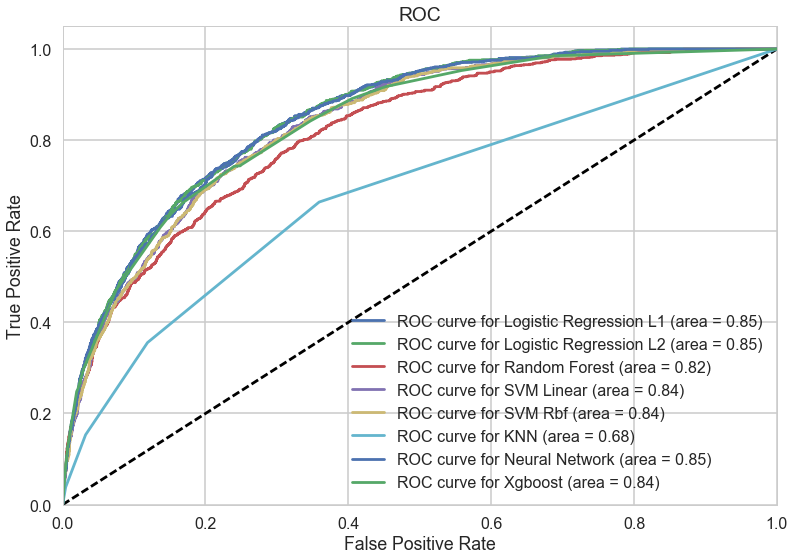

In [173]:
ax=make_roc('Logistic Regression L1',clf_l1,y_test, X_test)
# make_roc('Logistic Regression L1 PCA',clf_l1_pca,y_test, X_test_scaled_pca)
make_roc('Logistic Regression L2',clf_l2,y_test, X_test,ax)
make_roc('Random Forest',clf_rf,y_test, X_test,ax)
# make_roc('Random Forest PCA',clf_rf_pca,y_test, X_test_scaled_pca,ax)
make_roc('SVM Linear',clf_svc,y_test, X_test,ax,proba=False)
make_roc('SVM Rbf',clf_svm_Rbf,y_test, X_test,ax,proba=False)
# make_roc('SVM Linear PCA',clf_svc_pca,y_test, X_test_scaled_pca,ax,proba=False)
# make_roc('SVM Rbf PCA',clf_svm_Rbf_pca,y_test, X_test_scaled_pca,ax,proba=False)
make_roc('KNN',clf_knn,y_test, X_test,ax)
# make_roc('KNN PCA',clf_knn_pca,y_test, X_test_scaled_pca,ax)
make_roc('Neural Network',clf_mlp,y_test, X_test,ax)
make_roc('Xgboost',clf_Xgb,y_test, X_test,ax)

#### Profit curve

In [174]:
def percentage(tpr, fpr, priorp, priorn):
    perc = tpr*priorp + fpr*priorn
    return perc
def av_profit(tpr, fpr, util, priorp, priorn):
    profit = priorp*(util[1][1]*tpr+util[1][0]*(1.-tpr))+priorn*(util[0][0]*(1.-fpr) +util[0][1]*fpr)
    return profit

def make_profit(name, clf, ytest, xtest, util, ax=None, threshold=False, labe=200, proba=True):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    priorp=np.mean(ytest)
    priorn=1. - priorp
    ben=[]
    percs=[]
    for i,t in enumerate(thresholds):
        perc=percentage(tpr[i], fpr[i], priorp, priorn)
        ev = av_profit(tpr[i], fpr[i], util, priorp, priorn)
        ben.append(ev)
        percs.append(perc*100)
    ax.plot(percs, ben, '-', alpha=0.3, markersize=5, label='utlity curve for %s' % name)
    if threshold:
        label_kwargs = {}
        label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
        )
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (percs[k], ben[k]), **label_kwargs)
    ax.legend(loc="lower right")
    return ax

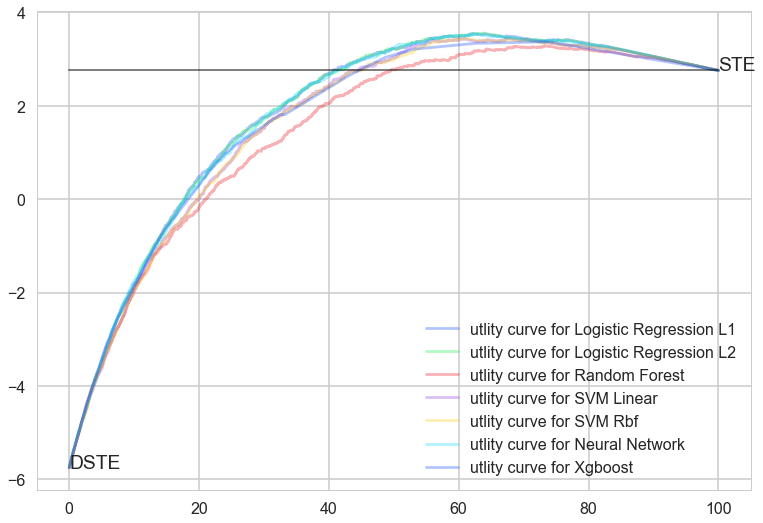

In [183]:
with sns.color_palette("bright"):
    ax=make_profit('Logistic Regression L1', clf_l1, y_test, X_test, u)
    # make_roc('Logistic Regression L1 PCA',clf_l1_pca,y_test, X_test_scaled_pca)
    make_profit('Logistic Regression L2',clf_l2,y_test, X_test,u)
    make_profit('Random Forest',clf_rf,y_test, X_test,u)
    # make_profit('Random Forest PCA',clf_rf_pca,y_test, X_test_scaled_pca,u)
    make_profit('SVM Linear',clf_svc,y_test, X_test,u,proba=False)
    make_profit('SVM Rbf',clf_svm_Rbf,y_test, X_test,u,proba=False)
    # make_profit('SVM Linear PCA',clf_svc_pca,y_test, X_test_scaled_pca,u,proba=False)
    # make_profit('SVM Rbf PCA',clf_svm_Rbf_pca,y_test, X_test_scaled_pca,u,proba=False)
#     make_profit('KNN',clf_knn,y_test, X_test)
    # make_profit('KNN PCA',clf_knn_pca,y_test, X_test_scaled_pca,u)
    make_profit('Neural Network',clf_mlp,y_test, X_test,u)
    make_profit('Xgboost',clf_Xgb,y_test, X_test,u)
    
    ax.annotate("DSTE", (0.0, dsteval))
    ax.annotate("STE", (100.0, steval))
    plt.plot([0,100],[steval,steval],'k-', alpha=0.5, lw=2)


#### Select models by profit analysis

In [59]:
def av_profit(tpr, fpr, util, priorp, priorn):
    profit = priorp*(util[1][1]*tpr+util[1][0]*(1.-tpr))+priorn*(util[0][0]*(1.-fpr) +util[0][1]*fpr)
    return profit

In [60]:
prep_and_mail=3
profit_margin=0.3

In [61]:
tnc=0.0 #tnr stands for "true negative cost"
tpc=prep_and_mail - df.AVRG.mean()*profit_margin 
fnc = df.AVRG.mean()*profit_margin
fpc=prep_and_mail

In [62]:
risk_matrix=np.array([[tnc, fpc],[fnc, tpc]])
u = - risk_matrix
u

array([[ -0.        ,  -3.        ],
       [-33.91813125,  30.91813125]])

In [63]:
priorp=np.mean(y_test)
priorn=1. - priorp

In [64]:
def average_profit_pp(y, ypred, u):
    c=confusion_matrix(y,ypred)
    score=np.sum(c*u)/np.sum(c)
    return score

#### baseline model

In [65]:
print y_test.value_counts()
print np.sum(y_test==1)/float(y_test.shape[0])

0.0    4982
1.0    1018
Name: RESP, dtype: int64
0.16966666666666666


In [66]:
testsize = y_test.shape[0]
ypred_dste = np.zeros(testsize, dtype="int")
print confusion_matrix(y_test, ypred_dste)
dsteval=average_profit_pp(y_test, ypred_dste, u)
dsteval

[[4982    0]
 [1018    0]]


-5.754776268749962

In [67]:
ypred_ste = np.ones(y_test.shape[0], dtype="int")
print confusion_matrix(y_test, ypred_ste)
steval = average_profit_pp(y_test, ypred_ste, u)
steval

[[   0 4982]
 [   0 1018]]


2.7547762687499615

#### model comapre with baseline

In [68]:
ypred=clf_l1.predict(X_test)
print confusion_matrix(y_test, ypred)
average_profit_pp(y_test, ypred, u)

[[4831  151]
 [ 707  311]]


-2.4695966624999848

In [69]:
ypred=clf_mlp.predict(X_test)
print confusion_matrix(y_test, ypred)
average_profit_pp(y_test, ypred, u)

[[4800  182]
 [ 673  345]]


-2.1176911749999876

In [70]:
ypred=clf_svm_Rbf.predict(X_test)
print confusion_matrix(y_test, ypred)
average_profit_pp(y_test, ypred, u)

[[4959   23]
 [ 935   83]]


-4.869374637499968

#### Change threshold for penalizing false negative

In [71]:
def t_repredict(est,t, xtest):
    probs=est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

In [72]:
confusion_matrix(y_test,t_repredict(clf_l1, 0.05, X_test))

array([[2243, 2739],
       [  32,  986]])

In [73]:
average_profit_pp(y_test, t_repredict(clf_l1, 0.95, X_test), u)

-5.744470224999962

In [74]:
average_profit_pp(y_test, t_repredict(clf_l1, 0.05, X_test), u)

3.530482868749964

#### Feature selection

In [184]:
from sklearn.feature_selection import SelectKBest

In [185]:
def pearson_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=pearsonr(v, y)
        i=i+1
    return np.abs(rs), pvals

In [186]:
%%time
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l1")
k_selected=SelectKBest(k=20,score_func=pearson_scorer).fit(X_train, y_train)

Wall time: 19 ms


In [187]:
k_selected_index=k_selected.get_support()

In [188]:
X_train_fs=X_train[X_train.columns[k_selected_index]]
X_test_fs=X_test[X_train.columns[k_selected_index]]

In [203]:
%%time
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l2")
c={"C": [0.001, 0.1,10.0,100.0]}
clf_l2=cv_optimize(logclf,c,X_train_fs,y_train,X_test_fs,y_test)

BEST {'C': 0.1}
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.86
[[4828  154]
 [ 712  306]]
########################################################
Wall time: 1.64 s


In [189]:
%%time
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l1")
c={"C": [0.001, 0.1,10.0,100.0]}
clf_l1=cv_optimize(logclf,c,X_train_fs,y_train,X_test_fs,y_test)

BEST {'C': 10.0}
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.86
[[4820  162]
 [ 705  313]]
########################################################
Wall time: 2.3 s


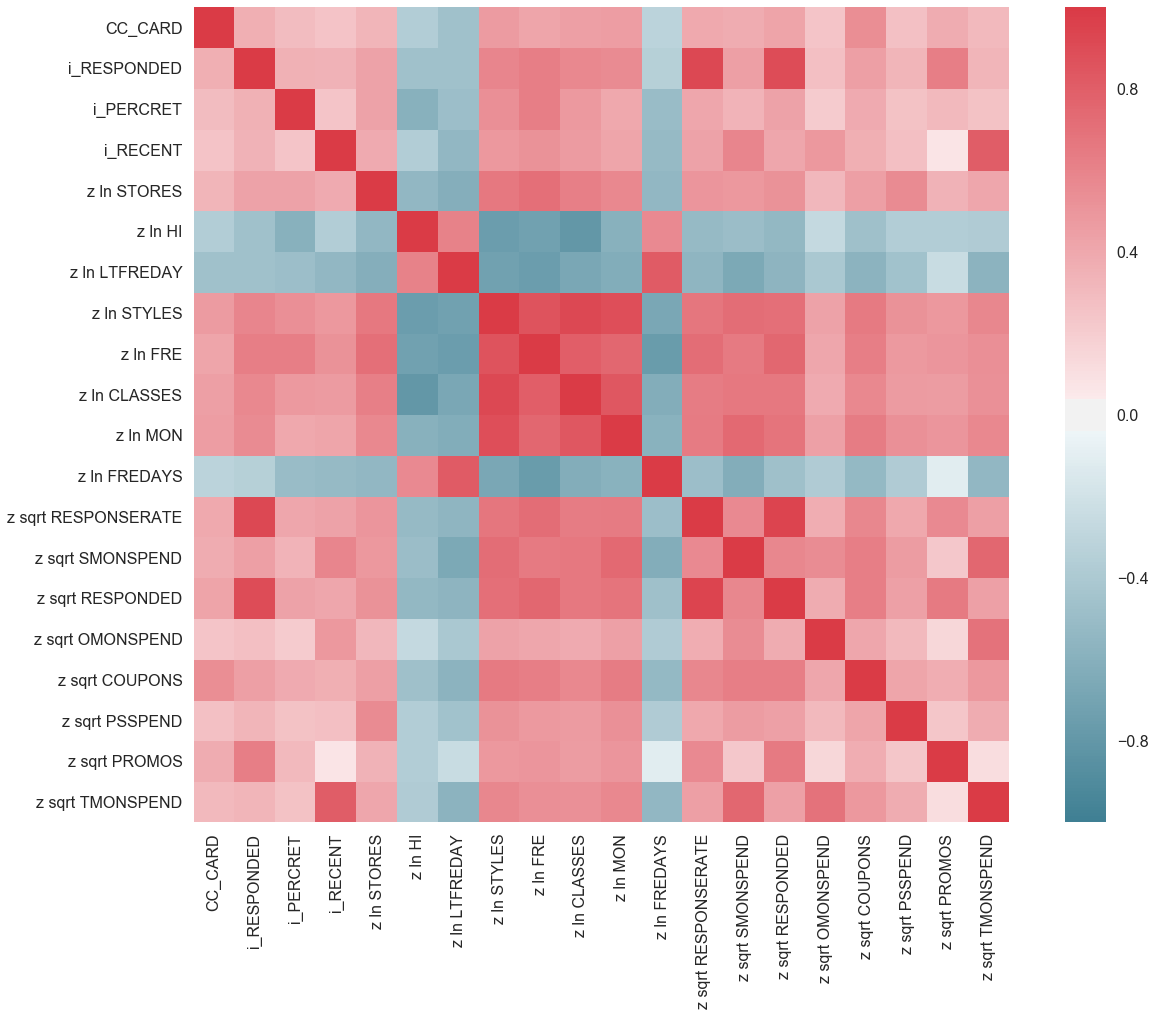

In [190]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 15))
corr = X_train_fs.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [191]:
clf_l1.coef_

array([[-1.87714098e-01,  1.15212868e-02, -7.50833772e-02,
        -1.43710390e-01, -9.19887846e-02, -8.49697289e-04,
        -2.07397762e+00, -1.49626793e-01,  1.27411209e+00,
        -1.61019203e-01,  8.46235296e-02,  1.34807875e+00,
         1.56889543e-01,  1.16144606e-01, -1.98280404e-01,
         4.88646536e-02, -1.06671875e-02, -1.45603479e-01,
        -2.41744863e-02,  1.49545594e-02]])

In [192]:
def nonzero_lasso(clf,col):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=col, 
                             coef=clf.coef_[0], 
                             abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef', ascending=False)

In [193]:
lasso_importances=nonzero_lasso(clf_l1,X_train_fs.columns)
lasso_importances.set_index("feature", inplace=True)
lasso_importances.head(20)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


abscoef      coef
feature                                
z ln LTFREDAY        2.073978 -2.073978
z ln FREDAYS         1.348079  1.348079
z ln FRE             1.274112  1.274112
z sqrt RESPONDED     0.198280 -0.198280
CC_CARD              0.187714 -0.187714
z ln CLASSES         0.161019 -0.161019
z sqrt RESPONSERATE  0.156890  0.156890
z ln STYLES          0.149627 -0.149627
z sqrt PSSPEND       0.145603 -0.145603
i_RECENT             0.143710 -0.143710
z sqrt SMONSPEND     0.116145  0.116145
z ln STORES          0.091989 -0.091989
z ln MON             0.084624  0.084624
i_PERCRET            0.075083 -0.075083
z sqrt OMONSPEND     0.048865  0.048865
z sqrt PROMOS        0.024174 -0.024174
z sqrt TMONSPEND     0.014955  0.014955
i_RESPONDED          0.011521  0.011521
z sqrt COUPONS       0.010667 -0.010667
z ln HI              0.000850 -0.000850

In [194]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()
parameters = {"n_estimators": range(1, 10), "max_depth": [4, 5, 6, 7,8,9,10],'min_samples_leaf': [ 3, 4, 5, 6]}
clf_rf=cv_optimize(clfForest,parameters,X_train_fs,y_train,X_test_fs,y_test)

BEST {'n_estimators': 9, 'max_depth': 7, 'min_samples_leaf': 6}
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.85
[[4863  119]
 [ 757  261]]
########################################################


In [195]:
from sklearn.svm import SVC
rbf_svm= SVC()
c_grid={'C': [0.001, 0.001,0.1, 1.0, 100.0,1000.0],'gamma':[1e-5, 1e-7,1e-8, 1e-9]}
clf_svm_Rbf=cv_optimize(rbf_svm,c_grid,X_train_fs,y_train,X_test_fs,y_test)

BEST {'C': 1000.0, 'gamma': 1e-05}
############# based on standard predict ################
Accuracy on training data: 0.83
Accuracy on test data:     0.83
[[4982    0]
 [1018    0]]
########################################################


In [196]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(random_state=0)
c_grid={'hidden_layer_sizes':[2,3,4,5,6],'activation': ['logistic', 'tanh','relu']}
clf_mlp=cv_optimize(clf_mlp,c_grid,X_train_fs,y_train,X_test_fs,y_test)

BEST {'activation': 'logistic', 'hidden_layer_sizes': 2}
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.85
[[4826  156]
 [ 717  301]]
########################################################


In [204]:
%%time
import xgboost as xgb
clf_Xgb = xgb.XGBClassifier()
parameters = {"n_estimators": range(1, 3),"reg_alpha":[1e-7,1e-6,0.0001,0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_Xgb=cv_optimize(clf_Xgb,parameters,X_train_fs,y_train,X_test_fs,y_test,score_func='f1')

C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWar

BEST {'n_estimators': 2, 'reg_alpha': 1e-07}
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.86
[[4883   99]
 [ 764  254]]
########################################################
Wall time: 4.31 s


C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to che

In [205]:
from sklearn.svm import LinearSVC

clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc=cv_optimize(clfsvm,c_grid,X_train_fs,y_train,X_test_fs,y_test)

BEST {'C': 1.0}
############# based on standard predict ################
Accuracy on training data: 0.84
Accuracy on test data:     0.83
[[4979    3]
 [ 991   27]]
########################################################


In [208]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier()
parameters={'n_neighbors':range(2,6)}
clf_knn=cv_optimize(clf,parameters,X_train_fs,y_train,X_test_fs,y_test)

BEST {'n_neighbors': 4}
############# based on standard predict ################
Accuracy on training data: 0.87
Accuracy on test data:     0.84
[[4845  137]
 [ 846  172]]
########################################################


#### ROC with selected features

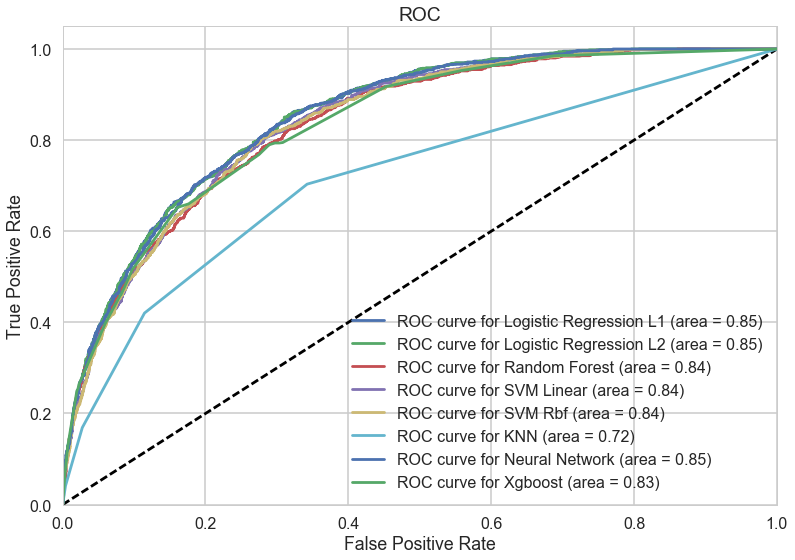

In [209]:
ax=make_roc('Logistic Regression L1',clf_l1,y_test, X_test_fs)
# make_roc('Logistic Regression L1 PCA',clf_l1_pca,y_test, X_test_scaled_pca)
make_roc('Logistic Regression L2',clf_l2,y_test, X_test_fs,ax)
make_roc('Random Forest',clf_rf,y_test, X_test_fs,ax)
# make_roc('Random Forest PCA',clf_rf_pca,y_test, X_test_scaled_pca,ax)
make_roc('SVM Linear',clf_svc,y_test, X_test_fs,ax,proba=False)
make_roc('SVM Rbf',clf_svm_Rbf,y_test, X_test_fs,ax,proba=False)
# make_roc('SVM Linear PCA',clf_svc_pca,y_test, X_test_scaled_pca,ax,proba=False)
# make_roc('SVM Rbf PCA',clf_svm_Rbf_pca,y_test, X_test_scaled_pca,ax,proba=False)
make_roc('KNN',clf_knn,y_test, X_test_fs,ax)
# make_roc('KNN PCA',clf_knn_pca,y_test, X_test_scaled_pca,ax)
make_roc('Neural Network',clf_mlp,y_test, X_test_fs,ax)
make_roc('Xgboost',clf_Xgb,y_test, X_test_fs,ax)

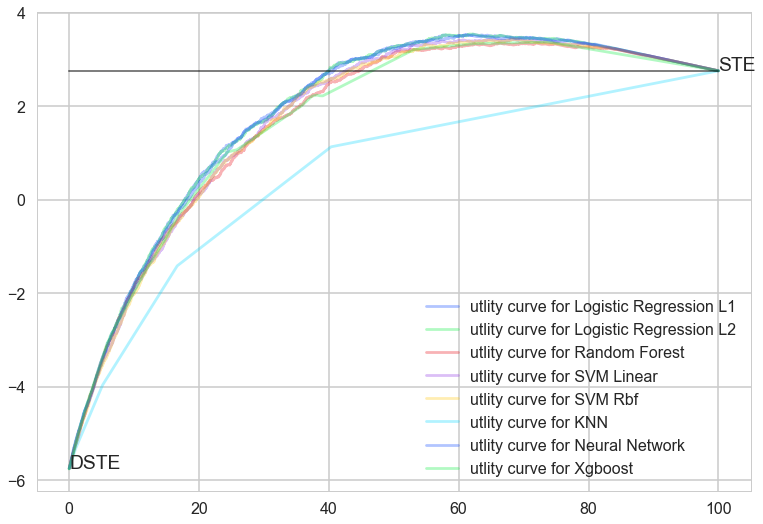

In [211]:
with sns.color_palette("bright"):
    ax=make_profit('Logistic Regression L1', clf_l1, y_test, X_test_fs, u)
    # make_roc('Logistic Regression L1 PCA',clf_l1_pca,y_test, X_test_scaled_pca)
    make_profit('Logistic Regression L2',clf_l2,y_test, X_test_fs,u)
    make_profit('Random Forest',clf_rf,y_test, X_test_fs,u)
    # make_profit('Random Forest PCA',clf_rf_pca,y_test, X_test_scaled_pca,u)
    make_profit('SVM Linear',clf_svc,y_test, X_test_fs,u,proba=False)
    make_profit('SVM Rbf',clf_svm_Rbf,y_test, X_test_fs,u,proba=False)
    # make_profit('SVM Linear PCA',clf_svc_pca,y_test, X_test_scaled_pca,u,proba=False)
    # make_profit('SVM Rbf PCA',clf_svm_Rbf_pca,y_test, X_test_scaled_pca,u,proba=False)
    make_profit('KNN',clf_knn,y_test, X_test_fs,u)
    # make_profit('KNN PCA',clf_knn_pca,y_test, X_test_scaled_pca,u)
    make_profit('Neural Network',clf_mlp,y_test, X_test_fs,u)
    make_profit('Xgboost',clf_Xgb,y_test, X_test_fs,u)
    
    ax.annotate("DSTE", (0.0, dsteval))
    ax.annotate("STE", (100.0, steval))
    plt.plot([0,100],[steval,steval],'k-', alpha=0.5, lw=2)


### Balance Data

In [212]:
df_train['RESP'].value_counts()

0.0    11678
1.0     2322
Name: RESP, dtype: int64

In [213]:
X_train.shape

(14000, 68)

In [214]:
# jtrain_new=np.arange(0, X_train.shape[0])
ipos_new = np.random.choice(X_train[y_train==1].index, 2000, replace=False)
ineg_new = np.random.choice(X_train[y_train==0].index, 2000, replace=False)
subsampled_i=np.concatenate((ipos_new,ineg_new))
X_train_blc=X_train.ix[subsampled_i]
y_train_blc=y_train.ix[subsampled_i]

In [215]:
X_train_blc.shape,y_train_blc.shape

((4000, 68), (4000L,))

In [216]:
from sklearn.svm import LinearSVC

clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc=cv_optimize(clfsvm,c_grid,X_train_blc,y_train_blc,X_test,y_test,score_func='f1')

BEST {'C': 0.1}
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.73
[[3583 1399]
 [ 195  823]]
########################################################


In [225]:
# %%time
# from sklearn.linear_model import LogisticRegression
# logclf=LogisticRegression(penalty="l1")
# c={"C": [0.001, 0.1,10.0,100.0]}
# clf_l1=cv_optimize(logclf,c,X_train_blc,y_train_blc,X_test,y_test)

BEST {'C': 0.1}
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.75
[[3692 1290]
 [ 217  801]]
########################################################
Wall time: 1.79 s


In [218]:
# %%time
# from sklearn.linear_model import LogisticRegression
# logclf=LogisticRegression(penalty="l2")
# c={"C": [0.001, 0.1,10.0,100.0]}
# clf_l2=cv_optimize(logclf,c,X_train_blc,y_train_blc,X_test,y_test)

BEST {'C': 0.1}
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.75
[[3684 1298]
 [ 215  803]]
########################################################
Wall time: 1.32 s


In [220]:
%%time
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l1")
c={"C": [0.001, 0.1,10.0,100.0]}
clf_l1=cv_optimize(logclf,c,X_train_blc,y_train_blc,X_test,y_test)

from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l2")
c={"C": [0.001, 0.1,10.0,100.0]}
clf_l2=cv_optimize(logclf,c,X_train_blc,y_train_blc,X_test,y_test)

from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()
parameters = {"n_estimators": range(1, 10), "max_depth": [4, 5, 6, 7,8,9,10],'min_samples_leaf': [ 3, 4, 5, 6]}
clf_rf=cv_optimize(clfForest,parameters,X_train_blc,y_train_blc,X_test,y_test)

from sklearn.svm import SVC
rbf_svm= SVC()
c_grid={'C': [0.001, 0.001,0.1, 1.0, 100.0,1000.0],'gamma':[1e-5, 1e-7,1e-8, 1e-9]}
clf_svm_Rbf=cv_optimize(rbf_svm,c_grid,X_train_blc,y_train_blc,X_test,y_test)

from sklearn.svm import LinearSVC

clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc=cv_optimize(clfsvm,c_grid,X_train_blc,y_train_blc,X_test,y_test)

from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(random_state=0)
c_grid={'hidden_layer_sizes':[2,3,4,5,6],'activation': ['logistic', 'tanh','relu']}
clf_mlp=cv_optimize(clf_mlp,c_grid,X_train_blc,y_train_blc,X_test,y_test)


import xgboost as xgb
clf_Xgb = xgb.XGBClassifier()
parameters = {"n_estimators": range(1, 3),"reg_alpha":[1e-7,1e-6,0.0001,0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_Xgb=cv_optimize(clf_Xgb,parameters,X_train_blc,y_train_blc,X_test,y_test,score_func='f1')

BEST {'C': 0.1}
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.75
[[3692 1290]
 [ 217  801]]
########################################################
BEST {'C': 0.1}
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.75
[[3684 1298]
 [ 215  803]]
########################################################
BEST {'n_estimators': 8, 'max_depth': 9, 'min_samples_leaf': 6}
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.72
[[3520 1462]
 [ 231  787]]
########################################################
BEST {'C': 1000.0, 'gamma': 1e-05}
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.73
[[3580 1402]
 [ 199  819]]
########################################################
BEST {'C': 0.1}
############# based on standard p

C:\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


BEST {'activation': 'logistic', 'hidden_layer_sizes': 2}
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.74
[[3634 1348]
 [ 214  804]]
########################################################


C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWar

BEST {'n_estimators': 2, 'reg_alpha': 0.1}
############# based on standard predict ################
Accuracy on training data: 0.78
Accuracy on test data:     0.73
[[3604 1378]
 [ 233  785]]
########################################################
Wall time: 4min 56s


C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to che

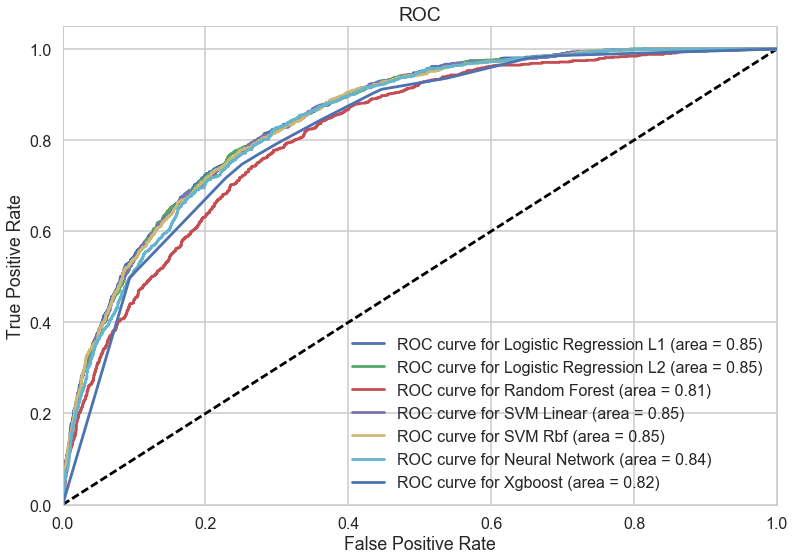

In [226]:
ax=make_roc('Logistic Regression L1',clf_l1,y_test, X_test)
# make_roc('Logistic Regression L1 PCA',clf_l1_pca,y_test, X_test_scaled_pca)
make_roc('Logistic Regression L2',clf_l2,y_test, X_test,ax)
make_roc('Random Forest',clf_rf,y_test, X_test,ax)
# make_roc('Random Forest PCA',clf_rf_pca,y_test, X_test_scaled_pca,ax)
make_roc('SVM Linear',clf_svc,y_test, X_test,ax,proba=False)
make_roc('SVM Rbf',clf_svm_Rbf,y_test, X_test,ax,proba=False)
# make_roc('SVM Linear PCA',clf_svc_pca,y_test, X_test_scaled_pca,ax,proba=False)
# make_roc('SVM Rbf PCA',clf_svm_Rbf_pca,y_test, X_test_scaled_pca,ax,proba=False)
# make_roc('KNN',clf_knn,y_test, X_test,ax)
# make_roc('KNN PCA',clf_knn_pca,y_test, X_test_scaled_pca,ax)
make_roc('Neural Network',clf_mlp,y_test, X_test,ax)
make_roc('Xgboost',clf_Xgb,y_test, X_test,ax)

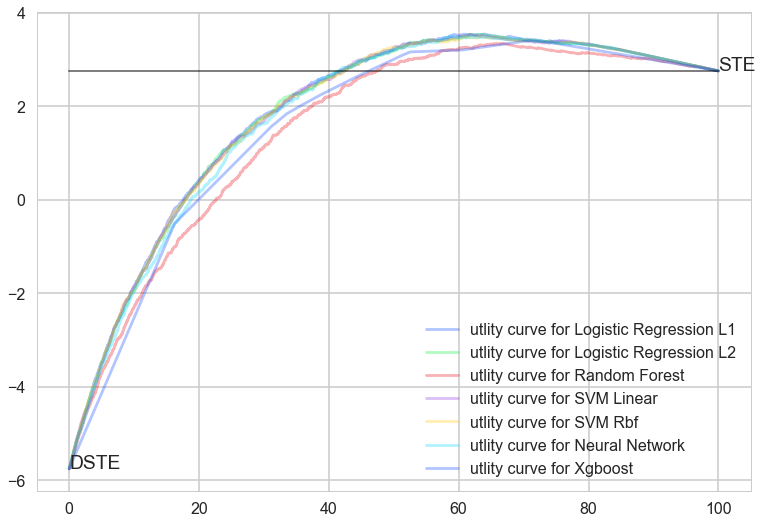

In [228]:
with sns.color_palette("bright"):
    ax=make_profit('Logistic Regression L1', clf_l1, y_test, X_test, u)
    # make_roc('Logistic Regression L1 PCA',clf_l1_pca,y_test, X_test_scaled_pca)
    make_profit('Logistic Regression L2',clf_l2,y_test, X_test,u)
    make_profit('Random Forest',clf_rf,y_test, X_test,u)
    # make_profit('Random Forest PCA',clf_rf_pca,y_test, X_test_scaled_pca,u)
    make_profit('SVM Linear',clf_svc,y_test, X_test,u,proba=False)
    make_profit('SVM Rbf',clf_svm_Rbf,y_test, X_test,u,proba=False)
    # make_profit('SVM Linear PCA',clf_svc_pca,y_test, X_test_scaled_pca,u,proba=False)
    # make_profit('SVM Rbf PCA',clf_svm_Rbf_pca,y_test, X_test_scaled_pca,u,proba=False)
#     make_profit('KNN',clf_knn,y_test, X_test,u)
    # make_profit('KNN PCA',clf_knn_pca,y_test, X_test_scaled_pca,u)
    make_profit('Neural Network',clf_mlp,y_test, X_test,u)
    make_profit('Xgboost',clf_Xgb,y_test, X_test,u)
    
    ax.annotate("DSTE", (0.0, dsteval))
    ax.annotate("STE", (100.0, steval))
    plt.plot([0,100],[steval,steval],'k-', alpha=0.5, lw=2)


#### Feature selected and balanced

In [229]:
X_train_fs_blac=X_train_blc[X_train_blc.columns[k_selected_index]]
X_test_fs=X_test[X_train_blc.columns[k_selected_index]]

In [230]:
%%time
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l1")
c={"C": [0.001, 0.1,10.0,100.0]}
clf_l1=cv_optimize(logclf,c,X_train_fs_blac,y_train_blc,X_test_fs,y_test)

from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l2")
c={"C": [0.001, 0.1,10.0,100.0]}
clf_l2=cv_optimize(logclf,c,X_train_fs_blac,y_train_blc,X_test_fs,y_test)

from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()
parameters = {"n_estimators": range(1, 10), "max_depth": [4, 5, 6, 7,8,9,10],'min_samples_leaf': [ 3, 4, 5, 6]}
clf_rf=cv_optimize(clfForest,parameters,X_train_fs_blac,y_train_blc,X_test_fs,y_test)

from sklearn.svm import SVC
rbf_svm= SVC()
c_grid={'C': [0.001, 0.001,0.1, 1.0, 100.0,1000.0],'gamma':[1e-5, 1e-7,1e-8, 1e-9]}
clf_svm_Rbf=cv_optimize(rbf_svm,c_grid,X_train_fs_blac,y_train_blc,X_test_fs,y_test)

from sklearn.svm import LinearSVC

clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc=cv_optimize(clfsvm,c_grid,X_train_fs_blac,y_train_blc,X_test_fs,y_test)

from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(random_state=0)
c_grid={'hidden_layer_sizes':[2,3,4,5,6],'activation': ['logistic', 'tanh','relu']}
clf_mlp=cv_optimize(clf_mlp,c_grid,X_train_fs_blac,y_train_blc,X_test_fs,y_test)


import xgboost as xgb
clf_Xgb = xgb.XGBClassifier()
parameters = {"n_estimators": range(1, 3),"reg_alpha":[1e-7,1e-6,0.0001,0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_Xgb=cv_optimize(clf_Xgb,parameters,X_train_fs_blac,y_train_blc,X_test_fs,y_test)

BEST {'C': 0.1}
############# based on standard predict ################
Accuracy on training data: 0.78
Accuracy on test data:     0.74
[[3672 1310]
 [ 221  797]]
########################################################
BEST {'C': 100.0}
############# based on standard predict ################
Accuracy on training data: 0.78
Accuracy on test data:     0.75
[[3691 1291]
 [ 219  799]]
########################################################
BEST {'n_estimators': 7, 'max_depth': 10, 'min_samples_leaf': 5}
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.72
[[3505 1477]
 [ 218  800]]
########################################################
BEST {'C': 1000.0, 'gamma': 1e-05}
############# based on standard predict ################
Accuracy on training data: 0.78
Accuracy on test data:     0.73
[[3582 1400]
 [ 200  818]]
########################################################
BEST {'C': 10.0}
############# based on standa

C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWar

BEST {'n_estimators': 2, 'reg_alpha': 1e-07}
############# based on standard predict ################
Accuracy on training data: 0.77
Accuracy on test data:     0.71
[[3408 1574]
 [ 187  831]]
########################################################
Wall time: 3min


C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [99]:
# %%time
# from sklearn.linear_model import LogisticRegression
# logclf=LogisticRegression(penalty="l1")
# c={"C": [0.001, 0.1,10.0,100.0]}
# clf_l1_blc_fs=cv_optimize(logclf,c,X_train_fs_blac,y_train_blc,X_test_fs,y_test)

BEST {'C': 100.0}
############# based on standard predict ################
Accuracy on training data: 0.78
Accuracy on test data:     0.75
[[3710 1272]
 [ 230  788]]
########################################################
Wall time: 522 ms


In [100]:
# from sklearn.svm import LinearSVC

# clfsvm=LinearSVC(loss="hinge")
# c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
# clf_svc=cv_optimize(clfsvm,c_grid,X_train_fs_blac,y_train_blc,X_test_fs,y_test,score_func='f1')

BEST {'C': 0.1}
############# based on standard predict ################
Accuracy on training data: 0.78
Accuracy on test data:     0.74
[[3629 1353]
 [ 214  804]]
########################################################


In [101]:
# from sklearn.svm import SVC
# rbf_svm= SVC()
# c_grid={'C': [0.001, 0.001,0.1, 1.0, 100.0,1000.0],'gamma':[1e-5, 1e-7,1e-8, 1e-9]}
# clf_svm_Rbf_bf=cv_optimize(rbf_svm,c_grid,X_train_fs_blac,y_train_blc,X_test_fs,y_test)

BEST {'C': 1000.0, 'gamma': 1e-05}
############# based on standard predict ################
Accuracy on training data: 0.78
Accuracy on test data:     0.73
[[3601 1381]
 [ 215  803]]
########################################################


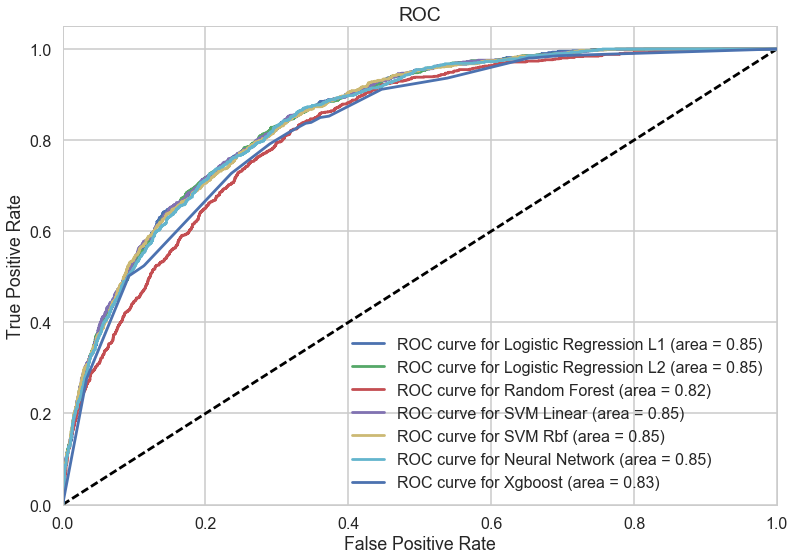

In [231]:
ax=make_roc('Logistic Regression L1',clf_l1,y_test, X_test_fs)
# make_roc('Logistic Regression L1 PCA',clf_l1_pca,y_test, X_test_scaled_pca)
make_roc('Logistic Regression L2',clf_l2,y_test, X_test_fs,ax)
make_roc('Random Forest',clf_rf,y_test, X_test_fs,ax)
# make_roc('Random Forest PCA',clf_rf_pca,y_test, X_test_scaled_pca,ax)
make_roc('SVM Linear',clf_svc,y_test, X_test_fs,ax,proba=False)
make_roc('SVM Rbf',clf_svm_Rbf,y_test, X_test_fs,ax,proba=False)
# make_roc('SVM Linear PCA',clf_svc_pca,y_test, X_test_scaled_pca,ax,proba=False)
# make_roc('SVM Rbf PCA',clf_svm_Rbf_pca,y_test, X_test_scaled_pca,ax,proba=False)
# make_roc('KNN',clf_knn,y_test, X_test,ax)
# make_roc('KNN PCA',clf_knn_pca,y_test, X_test_scaled_pca,ax)
make_roc('Neural Network',clf_mlp,y_test, X_test_fs,ax)
make_roc('Xgboost',clf_Xgb,y_test, X_test_fs,ax)

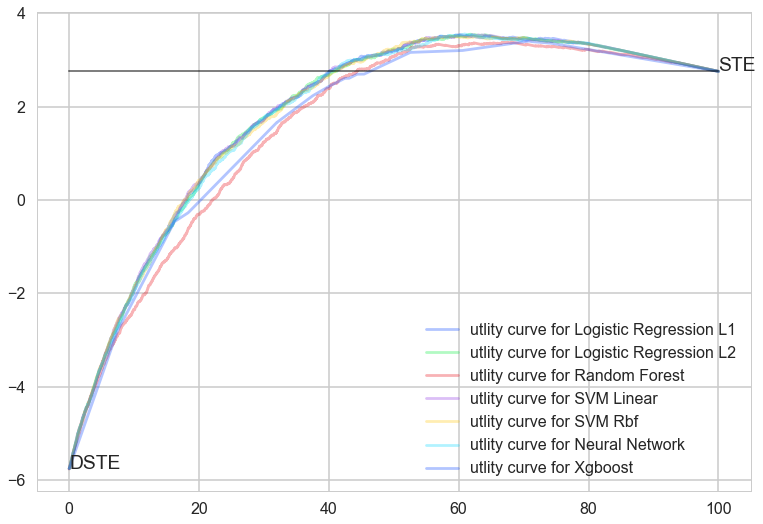

In [232]:
with sns.color_palette("bright"):
    ax=make_profit('Logistic Regression L1', clf_l1, y_test, X_test_fs, u)
    # make_roc('Logistic Regression L1 PCA',clf_l1_pca,y_test, X_test_scaled_pca)
    make_profit('Logistic Regression L2',clf_l2,y_test, X_test_fs,u)
    make_profit('Random Forest',clf_rf,y_test, X_test_fs,u)
    # make_profit('Random Forest PCA',clf_rf_pca,y_test, X_test_scaled_pca,u)
    make_profit('SVM Linear',clf_svc,y_test, X_test_fs,u,proba=False)
    make_profit('SVM Rbf',clf_svm_Rbf,y_test, X_test_fs,u,proba=False)
    # make_profit('SVM Linear PCA',clf_svc_pca,y_test, X_test_scaled_pca,u,proba=False)
    # make_profit('SVM Rbf PCA',clf_svm_Rbf_pca,y_test, X_test_scaled_pca,u,proba=False)
#     make_profit('KNN',clf_knn,y_test, X_test,u)
    # make_profit('KNN PCA',clf_knn_pca,y_test, X_test_scaled_pca,u)
    make_profit('Neural Network',clf_mlp,y_test, X_test_fs,u)
    make_profit('Xgboost',clf_Xgb,y_test, X_test_fs,u)
    
    ax.annotate("DSTE", (0.0, dsteval))
    ax.annotate("STE", (100.0, steval))
    plt.plot([0,100],[steval,steval],'k-', alpha=0.5, lw=2)


(2, 4)

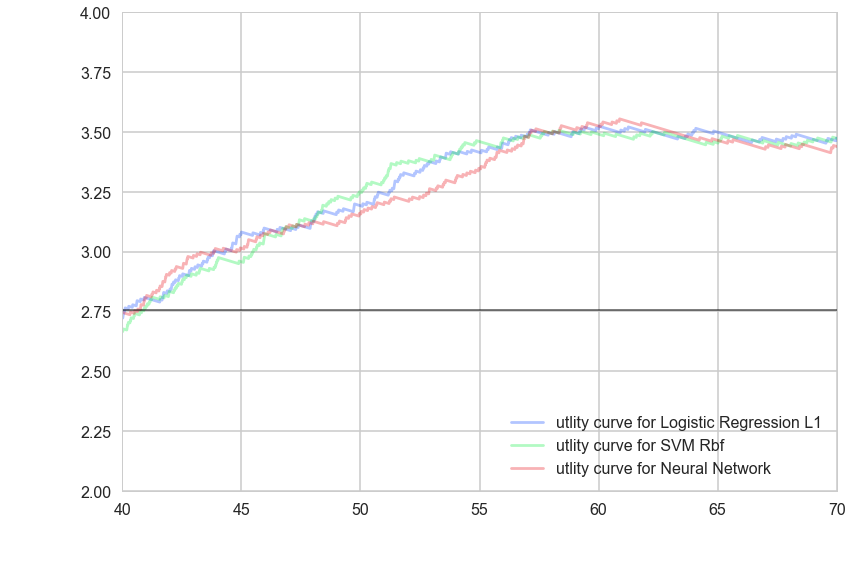

In [287]:
 with sns.color_palette("bright"):
# fig, ax = plt.subplots()
    ax=make_profit('Logistic Regression L1', clf_l1, y_test, X_test_fs, u)
    # make_roc('Logistic Regression L1 PCA',clf_l1_pca,y_test, X_test_scaled_pca)
#     make_profit('Logistic Regression L2',clf_l2,y_test, X_test_fs,u)
#     make_profit('Random Forest',clf_rf,y_test, X_test_fs,u)
    # make_profit('Random Forest PCA',clf_rf_pca,y_test, X_test_scaled_pca,u)
#     make_profit('SVM Linear',clf_svc,y_test, X_test_fs,u,proba=False)
    make_profit('SVM Rbf',clf_svm_Rbf,y_test, X_test_fs,u,proba=False)
    # make_profit('SVM Linear PCA',clf_svc_pca,y_test, X_test_scaled_pca,u,proba=False)
    # make_profit('SVM Rbf PCA',clf_svm_Rbf_pca,y_test, X_test_scaled_pca,u,proba=False)
    #     make_profit('KNN',clf_knn,y_test, X_test,u)
    # make_profit('KNN PCA',clf_knn_pca,y_test, X_test_scaled_pca,u)
    make_profit('Neural Network',clf_mlp,y_test, X_test_fs,u)
#     make_profit('Xgboost',clf_Xgb,y_test, X_test_fs,u)

    ax.annotate("DSTE", (0.0, dsteval))
    ax.annotate("STE", (100.0, steval))
    plt.plot([0,100],[steval,steval],'k-', alpha=0.5, lw=2)
    
    
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# axins = zoomed_inset_axes(ax, 2, loc=3) # zoom-factor: 2.5, location: upper-left

#     axins.plot(overview_data_x, overview_data_y)
x1, x2, y1, y2 = 40, 70, 2, 4 # specify the limits
ax.set_xlim(x1, x2) # apply the x-limits
ax.set_ylim(y1, y2) # apply the y-limits

(-2, 1)

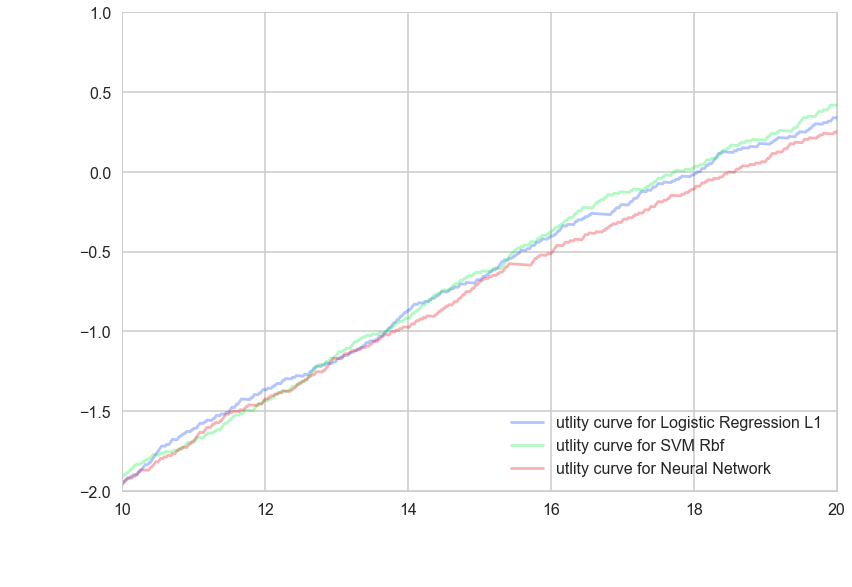

In [294]:
 with sns.color_palette("bright"):
# fig, ax = plt.subplots()
    ax=make_profit('Logistic Regression L1', clf_l1, y_test, X_test_fs, u)
    # make_roc('Logistic Regression L1 PCA',clf_l1_pca,y_test, X_test_scaled_pca)
#     make_profit('Logistic Regression L2',clf_l2,y_test, X_test_fs,u)
#     make_profit('Random Forest',clf_rf,y_test, X_test_fs,u)
    # make_profit('Random Forest PCA',clf_rf_pca,y_test, X_test_scaled_pca,u)
#     make_profit('SVM Linear',clf_svc,y_test, X_test_fs,u,proba=False)
    make_profit('SVM Rbf',clf_svm_Rbf,y_test, X_test_fs,u,proba=False)
    # make_profit('SVM Linear PCA',clf_svc_pca,y_test, X_test_scaled_pca,u,proba=False)
    # make_profit('SVM Rbf PCA',clf_svm_Rbf_pca,y_test, X_test_scaled_pca,u,proba=False)
    #     make_profit('KNN',clf_knn,y_test, X_test,u)
    # make_profit('KNN PCA',clf_knn_pca,y_test, X_test_scaled_pca,u)
    make_profit('Neural Network',clf_mlp,y_test, X_test_fs,u)
#     make_profit('Xgboost',clf_Xgb,y_test, X_test_fs,u)

    ax.annotate("DSTE", (0.0, dsteval))
    ax.annotate("STE", (100.0, steval))
    plt.plot([0,100],[steval,steval],'k-', alpha=0.5, lw=2)
    
    
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# axins = zoomed_inset_axes(ax, 2, loc=3) # zoom-factor: 2.5, location: upper-left

#     axins.plot(overview_data_x, overview_data_y)
x1, x2, y1, y2 = 10, 20, -2, 1 # specify the limits
ax.set_xlim(x1, x2) # apply the x-limits
ax.set_ylim(y1, y2) # apply the y-limits

In [299]:
(0.4--0.75)/0.75

1.5333333333333332

### PCA

In [ ]:
# pca_cols1=[
#  'FRE',
#  'MON',
#  'DAYS',
#  'FREDAYS',
#  'CLASSES',
#  'STYLES',
#  'STORES',
#  'HI',
#  'LTFREDAY',
#  'PERCRET']

# # pca_cols2=['PROMOS','COUPONS' ,'MARKDOWN']

In [ ]:
# import seaborn as sns

# f, ax = plt.subplots(figsize=(20, 15))
# corr = X_train[pca_cols1].corr()
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)
# plt.show()

In [ ]:
# from sklearn.decomposition import PCA
# pca_train_eigvct = PCA(n_components=1)
# pca_1 = pca_train_eigvct.fit(X_train[pca_cols1])

In [ ]:
# pca_1_v1_train=pca_1.transform(X_train[pca_cols1])
# pca_1_v1_test=pca_1.transform(X_test[pca_cols1])

In [ ]:
# pca_1.components_

In [ ]:
# print(pca_1.explained_variance_ratio_)

In [ ]:
# print pca_train_eigvct.explained_variance_ratio_.sum()

In [ ]:
# pca_train_eigvct.explained_variance_ratio_.shape[0]

In [ ]:
# df_train_pca = pd.DataFrame({"y":y_train.values})
# for i in range(pca_1.explained_variance_ratio_.shape[0]):
#     df_train_pca["pc%i" % (i+1)] = pca_1_v1_train[:,i]
# df_train_pca.head()

In [ ]:
# c0=sns.color_palette()[0]
# c1=sns.color_palette()[1]
# c2=sns.color_palette()[2]

# colors = [c0, c2]
# for label, color in zip(df_train_pca['y'].unique(), colors):
#     mask = df_train_pca['y']==label
#     plt.scatter(df_train_pca[mask]['pc1'], df_train_pca[mask]['pc2'], c=color, label=label)
# plt.legend()

In [ ]:
# X_train_pca=X_train.copy()
# X_test_pca=X_test.copy()

In [ ]:
# X_train_pca.shape

In [ ]:
# X_train_pca=X_train_pca.drop(pca_cols1,axis=1)
# X_test_pca=X_test_pca.drop(pca_cols1,axis=1)

In [ ]:
# X_train_pca.shape

In [ ]:
# X_train_pca['purchasing habits']=pca_1_v1_train
# X_test_pca['purchasing habits']=pca_1_v1_test

In [ ]:
# X_train_pca.shape

In [ ]:
# import seaborn as sns

# f, ax = plt.subplots(figsize=(20, 15))
# corr = X_train_pca.corr()
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)
# plt.show()

In [ ]:
# %%time
# from sklearn.linear_model import LogisticRegression
# logclf=LogisticRegression(penalty="l1")
# c={"C": [0.001, 0.1,10.0,100.0]}
# clf_l1_pca_fs=cv_optimize(logclf,c,X_train_pca,y_train,X_test_pca,y_test)